# 0. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import keras.backend as K
from keras import layers, regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor, kneighbors_graph
#import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from datetime import datetime, timedelta


# 1. Exploratory data analysis - EDA


In [2]:
# Download the dataset
dataframe_1 = pd.read_csv('./data/UNSW_NB15_training-set.csv')
dataframe_2 = pd.read_csv('./data/UNSW_NB15_testing-set.csv')
dataframe = pd.concat([dataframe_1, dataframe_2])
dataframe.head(10)

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   
5   6  0.380537   tcp       -   FIN     10      6     534     268  39.417980   
6   7  0.637109   tcp       -   FIN     10      8     534     354  26.683033   
7   8  0.521584   tcp       -   FIN     10      8     534     354  32.593026   
8   9  0.542905   tcp       -   FIN     10      8     534     354  31.313031   
9  10  0.258687   tcp       -   FIN     10      6     534     268  57.985135   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   
5  ...                 1              40             0           0   
6  ...                 1              40             0           0   
7  ...                 1              40             0           0   
8  ...                 1              40             0           0   
9  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   
5                 0           2          39                0      Normal   
6                 0           1          39                0      Normal   
7                 0           3          39                0      Normal   
8                 0           3          39                0      Normal   
9                 0           3          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      0  
8      0  
9      0  

[10 rows x 45 columns]

In [23]:
dataframe.shape

(257673, 45)

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt 

In [3]:
dataframe.drop(dataframe.columns[dataframe.columns.str.contains('id', case=False)], axis=1, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  dinpkt  

In [26]:
# Überprüfen Sie auf gemischte Typen in den Spalten
mixed_types = dataframe.apply(lambda x: any(isinstance(val, str) for val in x))

# Zeigen Sie die gemischten Typen und ihre Werte an
print("Gemischte Typen in den Spalten:")
for column, is_mixed_type in mixed_types.items():
    if is_mixed_type:
        mixed_values = dataframe.loc[dataframe[column].apply(lambda x: isinstance(x, str)), column].unique()
        print(f"Spalte {column} enthält gemischte Typen mit den Werten: {mixed_values}")

Gemischte Typen in den Spalten:
Spalte proto enthält gemischte Typen mit den Werten: ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 

<Axes: xlabel='label', ylabel='Count'>

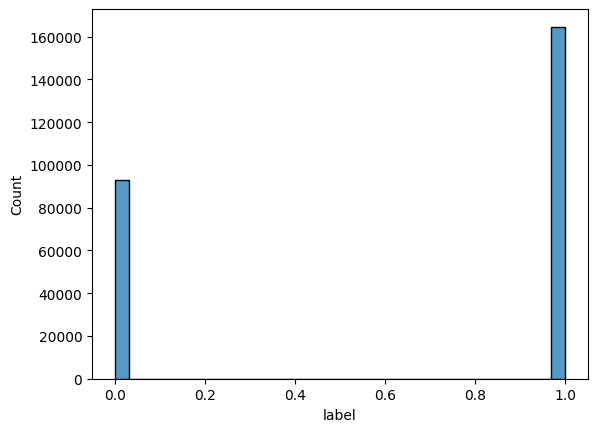

In [27]:
sns.histplot(x = dataframe.label)

## 1.2 Nummeric feature analysis

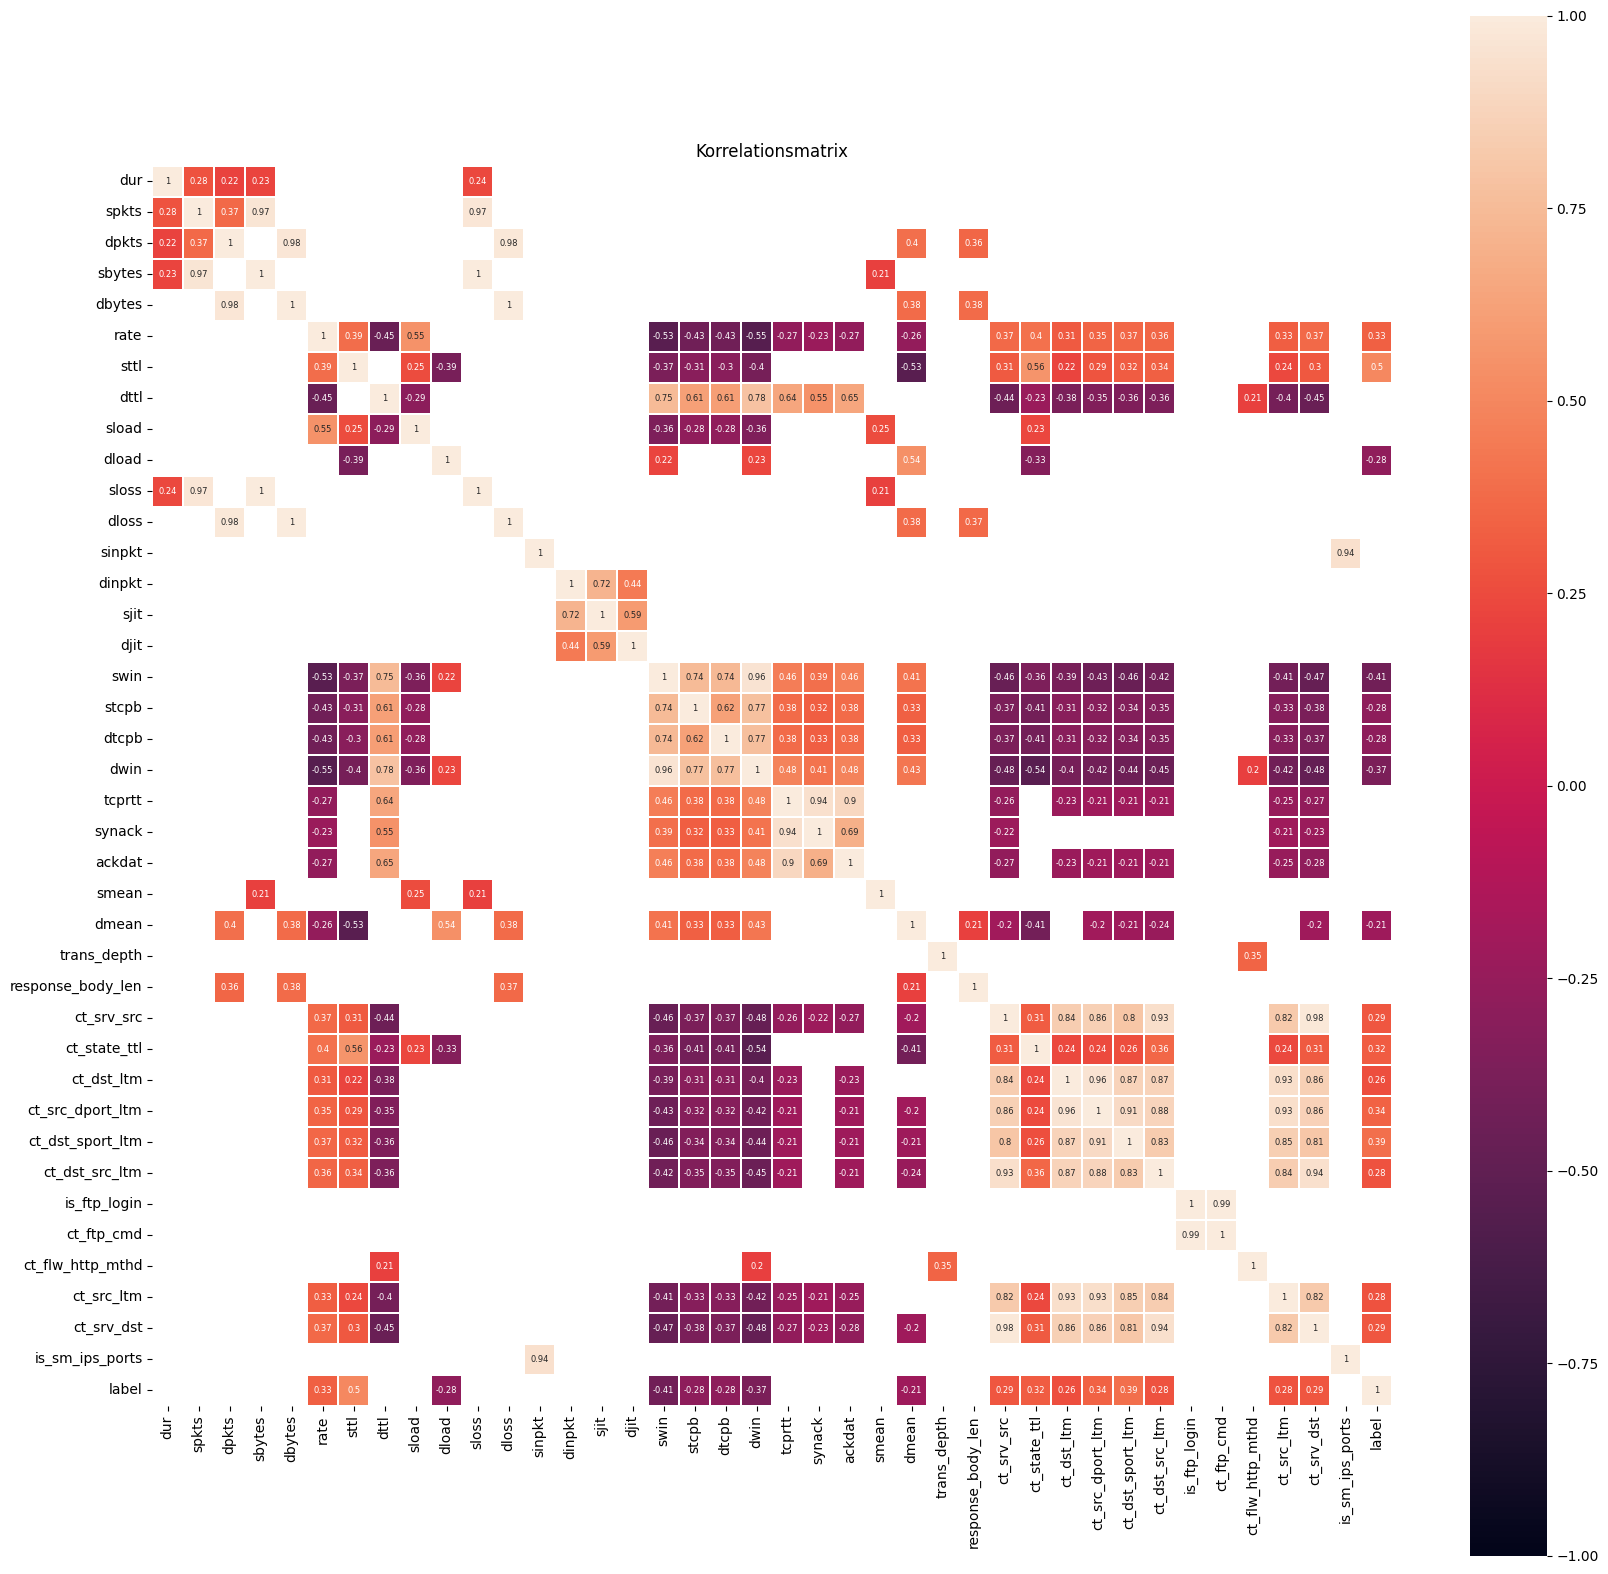

In [8]:
nummerisch = dataframe.select_dtypes(include=['float64', 'int64', 'int16', 'int32'])
corr_matrix = nummerisch.corr()
plt.figure(figsize=(20, 20))

sns.heatmap(corr_matrix[(corr_matrix >= 0.2) | (corr_matrix <= -0.2)], vmax=1.0, 
            vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 6}, square=True)
plt.title('Korrelationsmatrix')
plt.show()

In [9]:
df_num_corr = dataframe.corr(numeric_only=True)['label']
df_num_corr = df_num_corr[df_num_corr >= 0]
print(df_num_corr)

sbytes              0.020641
rate                0.328629
sttl                0.504159
sload               0.124548
sloss               0.006360
ct_srv_src          0.290195
ct_state_ttl        0.318517
ct_dst_ltm          0.257995
ct_src_dport_ltm    0.341513
ct_dst_sport_ltm    0.393668
ct_dst_src_ltm      0.279989
ct_src_ltm          0.276494
ct_srv_dst          0.292931
label               1.000000
Name: label, dtype: float64


In [10]:
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("There are {} strongly correlated values with Target:\n{}".format(len(golden_features_list), golden_features_list))

There are 14 strongly correlated values with Target:
label               1.000000
sttl                0.504159
ct_dst_sport_ltm    0.393668
ct_src_dport_ltm    0.341513
rate                0.328629
ct_state_ttl        0.318517
ct_srv_dst          0.292931
ct_srv_src          0.290195
ct_dst_src_ltm      0.279989
ct_src_ltm          0.276494
ct_dst_ltm          0.257995
sload               0.124548
sbytes              0.020641
sloss               0.006360
Name: label, dtype: float64


## 1.3 Object feature analysis

In [11]:
df_not_num = dataframe.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 4 non numerical features including:
['proto', 'service', 'state', 'attack_cat']


In [12]:
dtypes = dataframe.dtypes
categorical_features = dtypes[dtypes == 'object'].index.tolist()

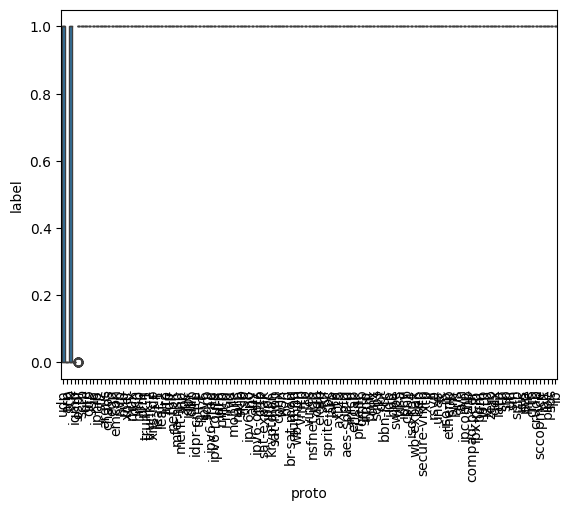

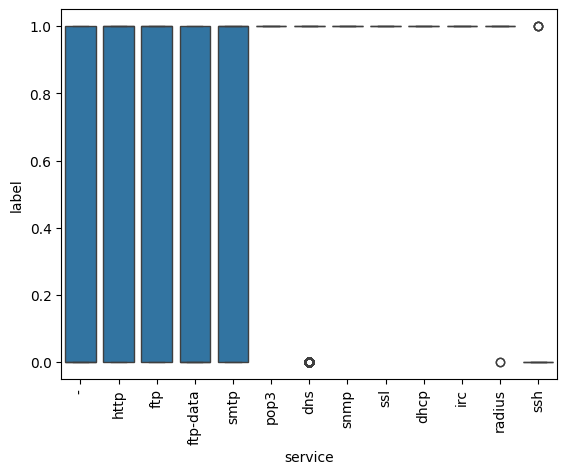

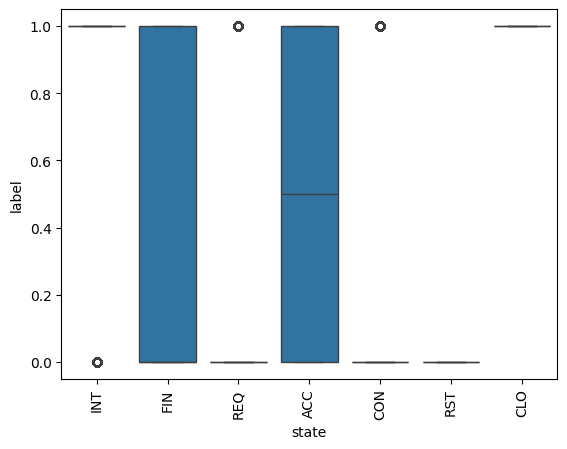

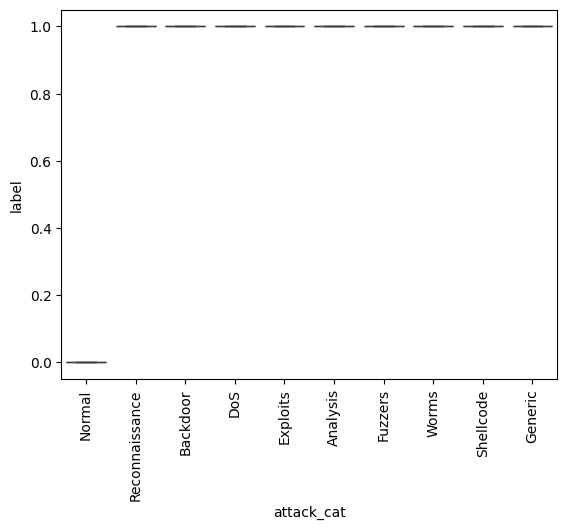

In [13]:
for feature in df_not_num:
        sns.boxplot(x=feature, y='label', data=dataframe)
        plt.xticks(rotation=90)  
        plt.show()

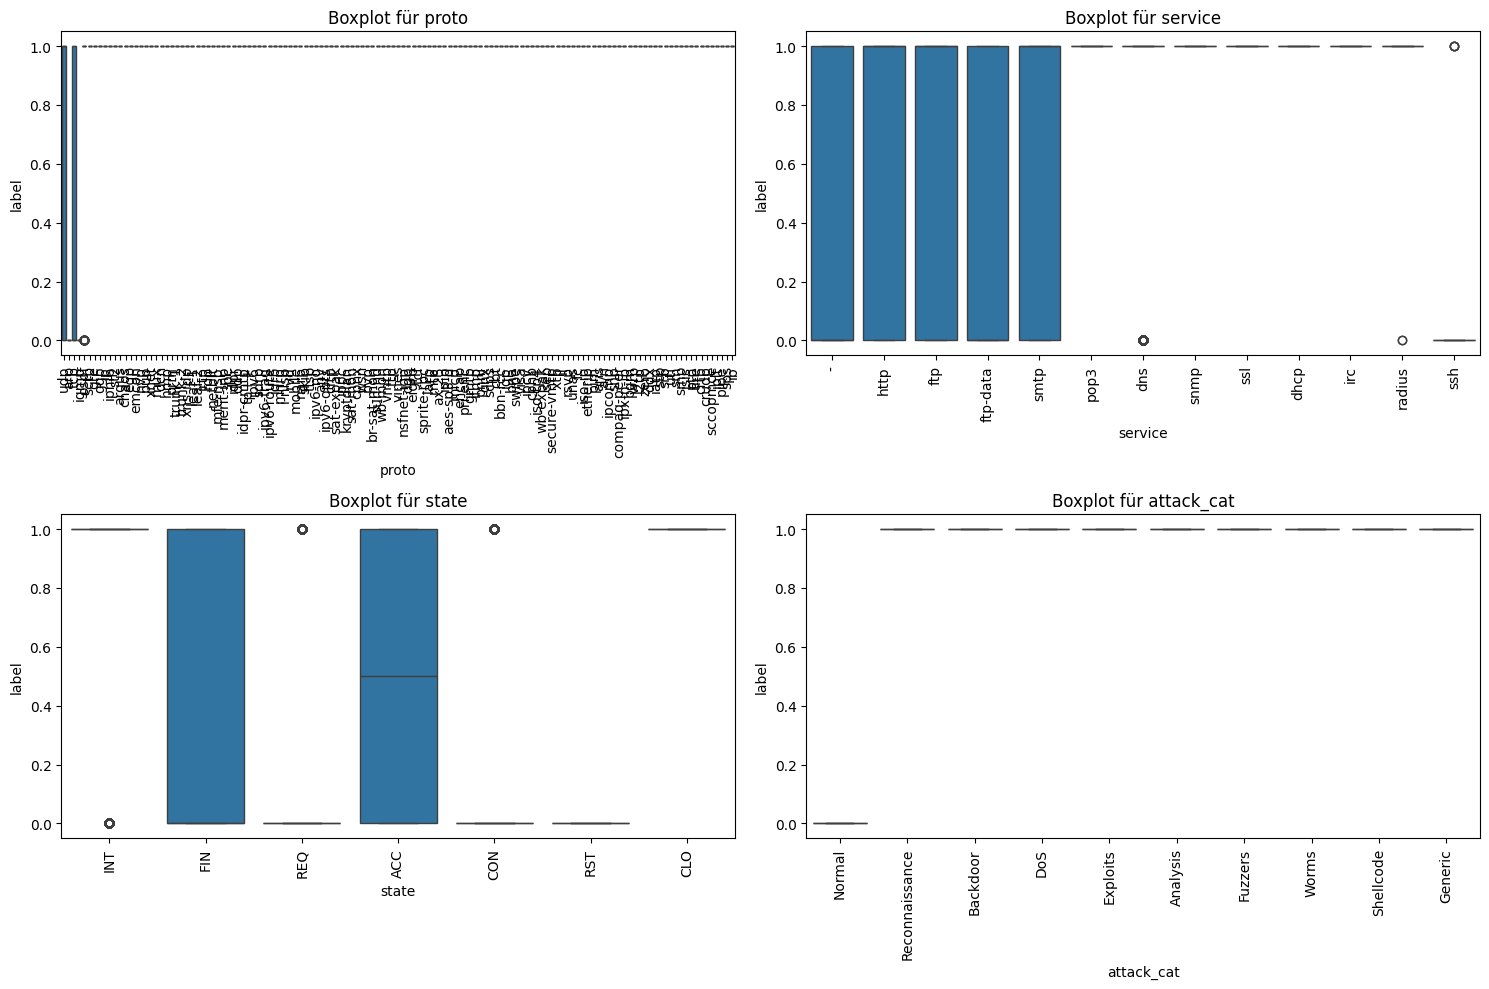

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


for i, feature in enumerate(df_not_num):
    row = i // 2  
    col = i % 2   
    sns.boxplot(x=feature, y='label', data=dataframe, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot für {feature}')
    axes[row, col].tick_params(axis='x', rotation=90)  
    
# Platz zwischen den Plots hinzufügen
plt.tight_layout()
plt.show()

In [15]:
dataframe.drop(dataframe.columns[dataframe.columns.str.contains('attack_cat', case=False)], axis=1, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

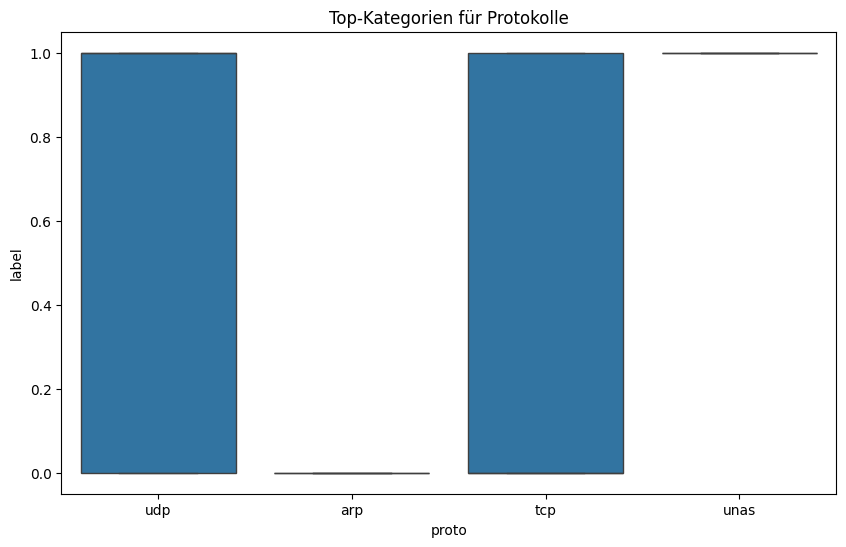

In [16]:
num_categories_to_display = 4

top_categories = dataframe['proto'].value_counts().nlargest(num_categories_to_display).index
df_filtered = dataframe[dataframe['proto'].isin(top_categories)]


plt.figure(figsize=(10, 6))
sns.boxplot(x='proto', y='label', data=df_filtered)
plt.title('Top-Kategorien für Protokolle')
#plt.xticks(rotation=90)  
plt.show()

In [17]:
pd.crosstab(index=dataframe['proto'], columns=dataframe['proto'])

proto      3pc  a/n  aes-sp3-d  any  argus  aris  arp  ax.25  bbn-rcc  bna  \
proto                                                                        
3pc         32    0          0    0      0     0    0      0        0    0   
a/n          0   32          0    0      0     0    0      0        0    0   
aes-sp3-d    0    0         32    0      0     0    0      0        0    0   
any          0    0          0   96      0     0    0      0        0    0   
argus        0    0          0    0     33     0    0      0        0    0   
...        ...  ...        ...  ...    ...   ...  ...    ...      ...  ...   
wsn          0    0          0    0      0     0    0      0        0    0   
xnet         0    0          0    0      0     0    0      0        0    0   
xns-idp      0    0          0    0      0     0    0      0        0    0   
xtp          0    0          0    0      0     0    0      0        0    0   
zero         0    0          0    0      0     0    0      0        0    0   

proto      ...  visa  vmtp  vrrp  wb-expak  wb-mon  wsn  xnet  xns-idp  xtp  \
proto      ...                                                                
3pc        ...     0     0     0         0       0    0     0        0    0   
a/n        ...     0     0     0         0       0    0     0        0    0   
aes-sp3-d  ...     0     0     0         0       0    0     0        0    0   
any        ...     0     0     0         0       0    0     0        0    0   
argus      ...     0     0     0         0       0    0     0        0    0   
...        ...   ...   ...   ...       ...     ...  ...   ...      ...  ...   
wsn        ...     0     0     0         0       0   32     0        0    0   
xnet       ...     0     0     0         0       0    0    33        0    0   
xns-idp    ...     0     0     0         0       0    0     0       34    0   
xtp        ...     0     0     0         0       0    0     0        0   32   
zero       ...     0     0     0         0       0    0     0        0    0   

proto      zero  
proto            
3pc           0  
a/n           0  
aes-sp3-d     0  
any           0  
argus         0  
...         ...  
wsn           0  
xnet          0  
xns-idp       0  
xtp           0  
zero         32  

[131 rows x 131 columns]

In [18]:
dtypes = dataframe.dtypes
categorical_features = dtypes[dtypes == 'object'].index.tolist()

In [19]:
nummerical_features = golden_features_list.index.tolist()

df_selected_features = dataframe[nummerical_features + categorical_features]

df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             82332 non-null  int64  
 1   sttl              82332 non-null  int64  
 2   ct_dst_sport_ltm  82332 non-null  int64  
 3   ct_src_dport_ltm  82332 non-null  int64  
 4   rate              82332 non-null  float64
 5   ct_state_ttl      82332 non-null  int64  
 6   ct_srv_dst        82332 non-null  int64  
 7   ct_srv_src        82332 non-null  int64  
 8   ct_dst_src_ltm    82332 non-null  int64  
 9   ct_src_ltm        82332 non-null  int64  
 10  ct_dst_ltm        82332 non-null  int64  
 11  sload             82332 non-null  float64
 12  sbytes            82332 non-null  int64  
 13  sloss             82332 non-null  int64  
 14  proto             82332 non-null  object 
 15  service           82332 non-null  object 
 16  state             82332 non-null  object

In [20]:
values_to_encode_proto      = ['tcp', 'udp', 'arp']
values_to_encode_service    = ['-', 'http', 'ftp', 'ftp-data', 'smtp']
values_to_encode_state      = ['FIN', 'ACC']

selected_rows_proto = df_selected_features[df_selected_features['proto'].isin(values_to_encode_proto)]


# dType: Object to float64
encoded_dataframe = pd.get_dummies(selected_rows_proto, columns=['proto'], prefix=["proto"], dtype=float)
selected_rows_service = encoded_dataframe[encoded_dataframe['service'].isin(values_to_encode_service)]

encoded_dataframe = pd.get_dummies(selected_rows_service, columns=['service'], prefix=["service"], dtype=float)
selected_rows_state = encoded_dataframe[encoded_dataframe['state'].isin(values_to_encode_state)]

encoded_dataframe = pd.get_dummies(selected_rows_state, columns=['state'], prefix=["state"], dtype=float)

encoded_dataframe.sample(10)

label  sttl  ct_dst_sport_ltm  ct_src_dport_ltm         rate  \
37373      0    31                 1                 2    27.971146   
26527      0    31                 1                 1  7795.099883   
67491      0   254                 1                 1    16.135816   
55895      1    62                 1                 1     8.213476   
82005      0   254                 1                 1    21.394736   
70762      0   254                 1                 1    24.930112   
66739      0   254                 1                 1    20.338873   
26135      0    31                 1                 2   165.974236   
67587      0   254                 1                 1    19.419640   
26654      0    31                 1                 1  7356.032088   

       ct_state_ttl  ct_srv_dst  ct_srv_src  ct_dst_src_ltm  ct_src_ltm  ...  \
37373             0           2           1               1           5  ...   
26527             0           8           8               1           4  ...   
67491             1           4           5               4           1  ...   
55895             1           1           2               1           2  ...   
82005             1           3           4               3           1  ...   
70762             1           3           4               3           2  ...   
66739             1           8           5               5           1  ...   
26135             0          13          14               4           7  ...   
67587             1           2           6               2           3  ...   
26654             0           8           3               3           3  ...   

       proto_arp  proto_tcp  proto_udp  service_-  service_ftp  \
37373        0.0        1.0        0.0        0.0          0.0   
26527        0.0        1.0        0.0        1.0          0.0   
67491        0.0        1.0        0.0        1.0          0.0   
55895        0.0        1.0        0.0        0.0          0.0   
82005        0.0        1.0        0.0        1.0          0.0   
70762        0.0        1.0        0.0        1.0          0.0   
66739        0.0        1.0        0.0        1.0          0.0   
26135        0.0        1.0        0.0        1.0          0.0   
67587        0.0        1.0        0.0        1.0          0.0   
26654        0.0        1.0        0.0        1.0          0.0   

       service_ftp-data  service_http  service_smtp  state_ACC  state_FIN  
37373               0.0           1.0           0.0        0.0        1.0  
26527               0.0           0.0           0.0        0.0        1.0  
67491               0.0           0.0           0.0        0.0        1.0  
55895               0.0           1.0           0.0        0.0        1.0  
82005               0.0           0.0           0.0        0.0        1.0  
70762               0.0           0.0           0.0        0.0        1.0  
66739               0.0           0.0           0.0        0.0        1.0  
26135               0.0           0.0           0.0        0.0        1.0  
67587               0.0           0.0           0.0        0.0        1.0  
26654               0.0           0.0           0.0        0.0        1.0  

[10 rows x 24 columns]

# Data processing (start)

In [4]:

label_encoder = LabelEncoder()
dataframe['proto'] = label_encoder.fit_transform(dataframe['proto'])
dataframe['service'] = label_encoder.fit_transform(dataframe['service'])
dataframe['state'] = label_encoder.fit_transform(dataframe['state'])
dataframe['attack_cat'] = label_encoder.fit_transform(dataframe['attack_cat'])


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  int32  
 2   service            257673 non-null  int32  
 3   state              257673 non-null  int32  
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  dinpkt  

In [20]:
dataframe.sample(10)

label       dur  proto  service  state  spkts  dpkts   sbytes  \
137757      1  0.000008    119        0      5    2.0    0.0    168.0   
46672       1  0.000007    119        0      5    2.0    0.0    104.0   
59558       1  0.188488    113        5      4   10.0    6.0    872.0   
63185       1  1.301685    113        0      4   20.0   30.0   1104.0   
57004       1  1.764898    113        0      4   72.0   26.0  71948.0   
42294       0  0.855382    113        0      4   16.0   12.0   5960.0   
75403       0  0.565851    113        5      4   10.0    8.0    796.0   
27381       0  0.012810    113        0      4   44.0   46.0   2766.0   
8210        0  0.001653    119        0      2    4.0    4.0    520.0   
32660       0  0.016862    113        0      4   48.0   50.0   2958.0   

         dbytes           rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
137757      0.0  125000.000300  ...               1.0               1.0   
46672       0.0  142857.140900  ...               1.0               1.0   
59558     268.0      79.580660  ...               1.0               1.0   
63185   19700.0      37.643517  ...               1.0               1.0   
57004    2082.0      54.960685  ...               1.0               1.0   
42294     678.0      31.564844  ...               1.0               1.0   
75403    1232.0      30.043246  ...               1.0               1.0   
27381   24004.0    6947.696993  ...               1.0               1.0   
8210      304.0    4234.724707  ...               1.0               1.0   
32660   32368.0    5752.579967  ...               1.0               1.0   

        ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
137757             1.0           0.0         0.0               0.0   
46672              1.0           0.0         0.0               0.0   
59558              1.0           0.0         0.0               1.0   
63185              1.0           0.0         0.0               0.0   
57004              1.0           0.0         0.0               0.0   
42294              4.0           0.0         0.0               0.0   
75403              3.0           0.0         0.0               1.0   
27381              1.0           0.0         0.0               0.0   
8210               6.0           0.0         0.0               0.0   
32660              1.0           0.0         0.0               0.0   

        ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  
137757         1.0         1.0              0.0           7  
46672          1.0         5.0              0.0           4  
59558          1.0         1.0              0.0           7  
63185         19.0         1.0              0.0           3  
57004          1.0         1.0              0.0           3  
42294          1.0         3.0              0.0           6  
75403          1.0         3.0              0.0           6  
27381          2.0         2.0              0.0           6  
8210           5.0        12.0              0.0           6  
32660          3.0        12.0              0.0           6  

[10 rows x 44 columns]

In [6]:
dataframe = dataframe.astype(float)
dataframe['label'] = dataframe['label'].astype(int)


In [22]:
dataframe.sample(10)

label       dur  proto  service  state  spkts  dpkts  sbytes   dbytes  \
160458      1  0.000009  119.0      2.0    5.0    2.0    0.0   114.0      0.0   
111435      1  0.424459  113.0      5.0    4.0   10.0    6.0   768.0    268.0   
9839        1  0.459249  113.0      5.0    4.0   10.0    8.0   778.0    872.0   
130825      1  0.000005  119.0      2.0    5.0    2.0    0.0   114.0      0.0   
37271       0  0.019963  113.0      0.0    4.0   50.0   48.0  3062.0  32264.0   
174575      1  0.000008  119.0      2.0    5.0    2.0    0.0   114.0      0.0   
127032      1  0.000008  119.0      2.0    5.0    2.0    0.0   114.0      0.0   
97585       1  2.349103  113.0      3.0    2.0   14.0   14.0   690.0   1038.0   
62197       1  0.676196  113.0      0.0    4.0   10.0    8.0   838.0   1126.0   
54204       1  0.432624  113.0      0.0    4.0   10.0    8.0   510.0    354.0   

                 rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
160458  111111.107200  ...              17.0              17.0   
111435      35.339101  ...               1.0               1.0   
9839        37.016957  ...               1.0               1.0   
130825  200000.005100  ...              16.0              16.0   
37271     4858.989137  ...               1.0               1.0   
174575  125000.000300  ...              12.0              12.0   
127032  125000.000300  ...              16.0              16.0   
97585       11.493749  ...               2.0               2.0   
62197       25.140640  ...               1.0               1.0   
54204       39.295091  ...               3.0               1.0   

        ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
160458            29.0           0.0         0.0               0.0   
111435             1.0           0.0         0.0               1.0   
9839               1.0           0.0         0.0               1.0   
130825            16.0           0.0         0.0               0.0   
37271              1.0           0.0         0.0               0.0   
174575            14.0           0.0         0.0               0.0   
127032            28.0           0.0         0.0               0.0   
97585              2.0           4.0         4.0               0.0   
62197              1.0           0.0         0.0               0.0   
54204              8.0           0.0         0.0               0.0   

        ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  
160458        18.0        29.0              0.0         5.0  
111435         1.0         1.0              0.0         7.0  
9839           1.0         1.0              0.0         3.0  
130825        19.0        16.0              0.0         5.0  
37271          1.0         3.0              0.0         6.0  
174575        12.0        14.0              0.0         5.0  
127032        17.0        28.0              0.0         5.0  
97585          2.0         2.0              0.0         3.0  
62197          2.0         4.0              0.0         0.0  
54204          3.0         8.0              0.0         4.0  

[10 rows x 44 columns]

In [7]:
label_column = dataframe['label']
dataframe = dataframe.drop(columns=['label'])
dataframe.insert(0, 'label', label_column)

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   label              257673 non-null  int32  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  float64
 3   service            257673 non-null  float64
 4   state              257673 non-null  float64
 5   spkts              257673 non-null  float64
 6   dpkts              257673 non-null  float64
 7   sbytes             257673 non-null  float64
 8   dbytes             257673 non-null  float64
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  float64
 11  dttl               257673 non-null  float64
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  float64
 15  dloss              257673 non-null  float64
 16  sinpkt  

## 2 Training and Testing 

In [8]:
#raw_data = encoded_dataframe.values # old data processing
raw_data = dataframe.values

In [9]:
labels = raw_data[:, 0]
train_data, test_data, train_labels, test_labels = train_test_split(raw_data, labels, test_size=0.2, random_state=21)

train_data[2]

array([1.00000000e+00, 2.57426200e+00, 1.13000000e+02, 0.00000000e+00,
       4.00000000e+00, 1.20000000e+01, 1.00000000e+01, 3.02600000e+03,
       7.88000000e+02, 8.15767800e+00, 2.54000000e+02, 2.52000000e+02,
       8.62072363e+03, 2.20645776e+03, 3.00000000e+00, 2.00000000e+00,
       2.27341824e+02, 2.73160438e+02, 1.38045924e+04, 4.48289094e+02,
       2.55000000e+02, 3.92035893e+09, 4.25897597e+09, 2.55000000e+02,
       2.11289000e-01, 1.15817000e-01, 9.54720000e-02, 2.52000000e+02,
       7.90000000e+01, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 4.00000000e+00])

In [8]:
len(train_data[1])

45

In [10]:

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)


train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

#data = raw_data[:, 1:]
normal_train_data[2]
print("train_data :",len(train_data))
print("test_data :",len(test_data))
print("normal train_data :",len(normal_train_data))
print("normal_test_data :",len(normal_test_data))
print("anormalous train_data :",len(anomalous_train_data))
print("anormalous test_data :",len(anomalous_test_data))

train_data : 206138
test_data : 51535
normal train_data : 131808
normal_test_data : 32865
anormalous train_data : 74330
anormalous test_data : 18670


#### setting training and test  data labels

In [11]:
normal_train_data_labels = normal_train_data[:, 0]
normal_test_data_labels = normal_test_data[:, 0]

anomalous_train_data_labels = anomalous_train_data[:, 0] 
anomalous_test_data_labels = anomalous_test_data[:, 0]

anomalous_test_data_labels[1]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### removing labels from test and training data

In [12]:
normal_train_data_wl = normal_train_data[:, 1:]
normal_test_data_wl = normal_test_data[:, 1:]

anomalous_train_data_wl = anomalous_train_data[:, 1:]
anomalous_test_data_wl = anomalous_test_data[:, 1:]

normal_train_data_wl[2]

<tf.Tensor: shape=(43,), dtype=float32, numpy=
array([2.5742619e+00, 1.1300000e+02, 0.0000000e+00, 4.0000000e+00,
       1.2000000e+01, 1.0000000e+01, 3.0260000e+03, 7.8800000e+02,
       8.1576777e+00, 2.5400000e+02, 2.5200000e+02, 8.6207236e+03,
       2.2064578e+03, 3.0000000e+00, 2.0000000e+00, 2.2734183e+02,
       2.7316043e+02, 1.3804593e+04, 4.4828909e+02, 2.5500000e+02,
       3.9203589e+09, 4.2589760e+09, 2.5500000e+02, 2.1128900e-01,
       1.1581700e-01, 9.5472001e-02, 2.5200000e+02, 7.9000000e+01,
       0.0000000e+00, 0.0000000e+00, 2.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 2.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       3.0000000e+00, 0.0000000e+00, 4.0000000e+00], dtype=float32)>

In [31]:
sdsdsd

NameError: name 'sdsdsd' is not defined

#### normalise training and test data

In [ ]:
min_val_normal_train = tf.reduce_min(normal_train_data_wl)
max_val_normal_train = tf.reduce_max(normal_train_data_wl)


min_val_normal_test = tf.reduce_min(normal_test_data_wl)
max_val_normal_test = tf.reduce_max(normal_test_data_wl)

min_val_anormalous_train = tf.reduce_min(anomalous_train_data_wl)
max_val_anormalous_train = tf.reduce_max(anomalous_train_data_wl)

min_val_anormalous_test = tf.reduce_min(anomalous_test_data_wl)
max_val_anormalous_test = tf.reduce_max(anomalous_test_data_wl)


# normal_train_data_wl tf.Tensor(0.0, shape=(), dtype=float32)
# normal_train_data_wl tf.Tensor(11631181.0, shape=(), dtype=float32)

#### normalisation using standard scaler (normalisation 1)

In [ ]:

scaler = StandardScaler()

normal_train_data_wl_normalized = scaler.fit_transform(normal_train_data_wl)
normal_test_data_wl_normalized = scaler.fit_transform(normal_test_data_wl)

anomalous_train_data_wl_normalized =  scaler.fit_transform(anomalous_train_data_wl)
anomalous_test_data_wl_normalized =  scaler.fit_transform(anomalous_test_data_wl)

#### normalisation using MinMaxScaler (normalisation 2) best ohne feature selection

In [13]:

scaler = MinMaxScaler()

normal_train_data_wl_normalized = scaler.fit_transform(normal_train_data_wl)
normal_test_data_wl_normalized = scaler.fit_transform(normal_test_data_wl)

anomalous_train_data_wl_normalized =  scaler.fit_transform(anomalous_train_data_wl)
anomalous_test_data_wl_normalized =  scaler.fit_transform(anomalous_test_data_wl)

#### simple normalise  (normalisation 3)

In [ ]:
#Fit the scaler on the training data and transform it
normal_train_data_wl_normalized = (normal_train_data_wl - min_val_normal_train)/ (max_val_normal_train - min_val_normal_train)
normal_test_data_wl_normalized = (normal_test_data_wl - min_val_normal_train)/ (max_val_normal_test- min_val_normal_test)

anomalous_train_data_wl_normalized = (anomalous_train_data_wl - min_val_normal_train)/ (max_val_anormalous_train- min_val_anormalous_train)
anomalous_test_data_wl_normalized = (anomalous_test_data_wl - min_val_normal_train)/ (max_val_anormalous_test- min_val_anormalous_test)


normal_train_data_wl_normalized[10]


<tf.Tensor: shape=(23,), dtype=float32, numpy=
array([5.3304993e-06, 8.5975792e-08, 8.5975792e-08, 9.4943271e-06,
       8.5975792e-08, 8.5975792e-08, 8.5975790e-07, 8.5975792e-08,
       4.2987895e-07, 8.5975792e-08, 4.8661907e-04, 7.9200900e-04,
       5.1585477e-07, 0.0000000e+00, 8.5975792e-08, 0.0000000e+00,
       8.5975792e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 8.5975792e-08], dtype=float32)>

In [17]:
# normal_train_data_wl_normalized = tf.constant(normal_train_data_wl, dtype=tf.float32)
# normal_test_data_wl_normalized = tf.constant(normal_test_data_wl, dtype=tf.float32)

# anomalous_train_data_wl_normalized = tf.constant(anomalous_train_data_wl, dtype=tf.float32)
# anomalous_test_data_wl_normalized = tf.constant(anomalous_test_data_wl, dtype=tf.float32)



normal_train_data_wl_normalized = tf.constant(normal_train_data_wl_normalized, dtype=tf.float32)
normal_test_data_wl_normalized = tf.constant(normal_test_data_wl_normalized, dtype=tf.float32)

anomalous_train_data_wl_normalized = tf.constant(anomalous_train_data_wl_normalized, dtype=tf.float32)
anomalous_test_data_wl_normalized = tf.constant(anomalous_test_data_wl_normalized, dtype=tf.float32)

normal_train_data_wl_normalized[2]


<tf.Tensor: shape=(44,), dtype=float32, numpy=
array([4.7470260e-01, 4.2904705e-02, 8.5606062e-01, 0.0000000e+00,
       5.0000000e-01, 1.0333490e-03, 9.0760575e-04, 2.0911482e-04,
       5.3760759e-05, 8.1576773e-06, 9.9607843e-01, 9.9604744e-01,
       1.4396666e-06, 9.0145477e-04, 5.6401582e-04, 3.6317416e-04,
       2.6945337e-03, 5.5909506e-03, 1.1687276e-02, 1.8890692e-03,
       1.0000000e+00, 9.1278344e-01, 9.9166423e-01, 1.0000000e+00,
       1.4173792e-01, 1.9460595e-01, 6.7042075e-02, 1.5405406e-01,
       5.4332875e-02, 0.0000000e+00, 0.0000000e+00, 1.7241379e-02,
       1.6666667e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.5625000e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.4482758e-02, 0.0000000e+00, 4.4444445e-01],
      dtype=float32)>

### plot data instance

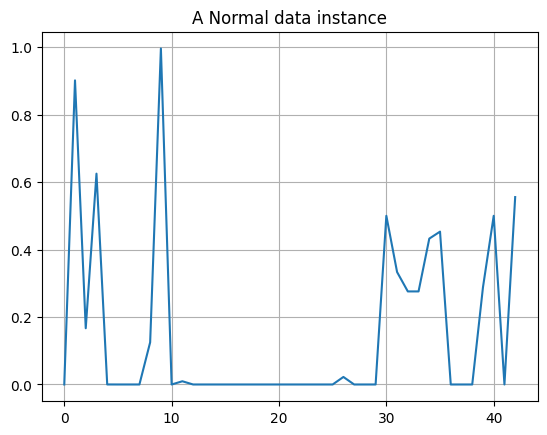

In [14]:
plt.grid()
plt.plot(np.arange(43), normal_train_data_wl_normalized[0])
plt.title("A Normal data instance")
plt.show()

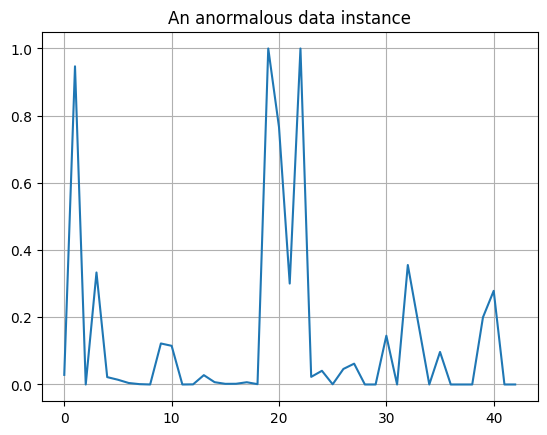

In [15]:
plt.grid()
plt.plot(np.arange(43), anomalous_test_data_wl_normalized[0])
plt.title("An anormalous data instance")
plt.show()

# unsupervised Contractive Autoencoder (Start)

In [21]:
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout
from keras import layers
import keras 
from numpy import array
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [26]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  acc = accuracy_score(labels, predictions)
  pre = precision_score(labels, predictions)
  f1 = recall_score(labels, predictions)
  recall = recall_score(labels, predictions)
  return acc, pre , f1, recall

In [28]:
def append_model_reults(name, results, training_time, prediction_time, accuracy, recall, precision, f1):
    
    results.append({
        'Modell': name,
        'Parameter': "",
        'Trainingszeit': training_time,
        'Vorhersagezeit': prediction_time,
        'Genauigkeit': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
        })
    return results

In [73]:
class ContractiveAnomalyDetector(tf.keras.Model):
    def __init__(self, lam=1e-8 ): #, constant_value=10#
        super(ContractiveAnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(43, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(64, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(32, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(16, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(8, activation="relu"),
            layers.BatchNormalization()])

        self.decoder = tf.keras.Sequential([
            layers.Dense(8, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(16, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(32, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(64, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(43, activation="sigmoid")])

        self.lam = lam  # Regularization strength
        #self.constant_value = constant_value

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def compute_jacobian(self, x):
        x = tf.convert_to_tensor(x)  # Ensure x is a tf.Tensor
    
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            encoded = self.encoder(x)
    
        jacobian = tape.jacobian(encoded, x)
        
        return jacobian

    
    def contractive_loss(self, x, x_hat, jacobian):
        mse_loss = tf.reduce_mean(tf.square(x - x_hat))
        squared_jacobian = tf.square(jacobian)
        frobenius_norm = tf.sqrt(tf.reduce_sum(squared_jacobian))        
        # Combine the losses
        total_loss = mse_loss + self.lam * frobenius_norm # + self.constant_value
        return total_loss       

  

In [ ]:

def train_step(self, data):
    x, _ = data
    with tf.GradientTape() as tape:
        x_hat = self(x)
        jacobian = self.compute_jacobian(x)
        loss = self.contractive_loss(x, x_hat, jacobian)
        
    gradients = tape.gradient(loss, self.trainable_variables)
    
    # for grad in gradients:
    #    print(tf.reduce_max(grad), tf.reduce_min(grad), tf.reduce_mean(grad))
            # Check for NaN or Inf values in gradients
    
                # Apply gradient clipping
    clipped_gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)        
    self.optimizer.apply_gradients(zip(clipped_gradients, self.trainable_variables))

    return {"loss": loss}
# The compute_jacobian method calculates the Jacobian matrix of the encoded representation with respect to the input.

# The contractive_loss method computes the contractive loss, which is a combination of the mean squared error (MSE) reconstruction loss and the Frobenius norm of the Jacobian matrix.

# The train_step method is overridden to include the contractive loss during training.


In [74]:
contractive_autoencoder = ContractiveAnomalyDetector()
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.09,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

contractive_autoencoder.compile(optimizer=optimizer, loss='mse')

In [75]:
contractive_autoencoder.build(input_shape = (None, 43))
contractive_autoencoder.summary()

Model: "contractive_anomaly_detector_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 8)                 8104      
                                                                 
 sequential_13 (Sequential)  (None, 43)                6147      
                                                                 
Total params: 14,251
Trainable params: 13,685
Non-trainable params: 566
_________________________________________________________________


In [57]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)
#print("Batch Size:", batch_size)

In [58]:
results = []

In [76]:
start = time.time()
history = contractive_autoencoder.fit(
    normal_train_data_wl_normalized,
    normal_train_data_wl_normalized,
    epochs=200,
    batch_size=1000,
    validation_data=(normal_test_data_wl_normalized, normal_test_data_wl_normalized),
    shuffle=True)
end_train = time.time()

Epoch 1/200
132/132 [==============================] - 4s 16ms/step - loss: 0.1289 - val_loss: 0.0502
Epoch 2/200
132/132 [==============================] - 2s 13ms/step - loss: 0.0226 - val_loss: 0.0191
Epoch 3/200
132/132 [==============================] - 2s 13ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 4/200
132/132 [==============================] - 2s 13ms/step - loss: 0.0059 - val_loss: 0.0073
Epoch 5/200
132/132 [==============================] - 2s 13ms/step - loss: 0.0059 - val_loss: 0.0053
Epoch 6/200
132/132 [==============================] - 2s 14ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 7/200
132/132 [==============================] - 2s 13ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 8/200
132/132 [==============================] - 2s 13ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 9/200
132/132 [==============================] - 2s 13ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 10/200
132/132 [==============================] - 2s 14ms/step - loss: 0.003

In [77]:
reconstructions = contractive_autoencoder.predict(anomalous_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_wl_normalized)
threshold = np.mean(test_loss) + np.std(test_loss)
preds = predict(contractive_autoencoder, anomalous_test_data_wl_normalized, threshold)
accuracy,precision, f1, recall= print_stats(preds, anomalous_test_data_labels)

end_predict_anomaly= time.time()


584/584 [==============================] - 2s 3ms/step


c:\Users\Alexej\miniconda3\envs\simple-htr-gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alexej\miniconda3\envs\simple-htr-gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
results = append_model_reults("contractive_autoencoder_anomaly", results, end_train - start, end_predict_anomaly - end_train, accuracy, recall, precision, f1)

In [79]:
reconstructions = contractive_autoencoder.predict(normal_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, normal_test_data_wl_normalized)
threshold = np.mean(test_loss) + np.std(test_loss)
preds = predict(contractive_autoencoder, normal_test_data_wl_normalized, threshold)

accuracy, precision, f1, recall= print_stats(preds, normal_test_data_labels)

end_predict_normal = time.time()

  18/1028 [..............................] - ETA: 2s 

1028/1028 [==============================] - 3s 3ms/step


In [80]:
results = append_model_reults("contractive_autoencoder_normal", results, end_train - start, end_predict_normal - end_train, accuracy, recall, precision, f1)


In [81]:
results.pop(1)
results.pop(0)

{'Modell': 'contractive_autoencoder_anomaly',
 'Parameter': '',
 'Trainingszeit': 56.102081537246704,
 'Vorhersagezeit': 2.2611780166625977,
 'Genauigkeit': 0.038189608998393146,
 'Recall': 0.0,
 'Precision': 0.0,
 'F1 Score': 0.0}

In [82]:
for x in results:
    print(x)

{'Modell': 'sparse_autoencoder_anomaly', 'Parameter': '', 'Trainingszeit': 82.32528185844421, 'Vorhersagezeit': 0.9083859920501709, 'Genauigkeit': 0.08950187466523835, 'Recall': 0.0, 'Precision': 0.0, 'F1 Score': 0.0}
{'Modell': 'sparse_autoencoder_normal', 'Parameter': '', 'Trainingszeit': 82.32528185844421, 'Vorhersagezeit': 2.322828769683838, 'Genauigkeit': 0.8390689183021451, 'Recall': 0.8390689183021451, 'Precision': 1.0, 'F1 Score': 0.8390689183021451}
{'Modell': 'contractive_autoencoder_anomaly', 'Parameter': '', 'Trainingszeit': 349.54018235206604, 'Vorhersagezeit': 2.0985755920410156, 'Genauigkeit': 0.08216389930369578, 'Recall': 0.0, 'Precision': 0.0, 'F1 Score': 0.0}
{'Modell': 'contractive_autoencoder_normal', 'Parameter': '', 'Trainingszeit': 349.54018235206604, 'Vorhersagezeit': 5.414040565490723, 'Genauigkeit': 0.9444698006998327, 'Recall': 0.9444698006998327, 'Precision': 1.0, 'F1 Score': 0.9444698006998327}


In [83]:
df_results_unsupervised= pd.DataFrame(results)
df_results_unsupervised.to_csv('./data/df_results_unsupervised.csv', index=False)

In [ ]:
df_results_sae = pd.read_csv('./data/df_results_sae.csv')

In [ ]:
# df_results_all = pd.concat([df_results_c, df_results_a], ignore_index=True)

In [84]:
df_results_unsupervised.style.background_gradient(subset=['Trainingszeit'], cmap='RdYlGn_r') \
                            .background_gradient(subset=['Vorhersagezeit'], cmap='RdYlGn_r') \
                            .background_gradient(subset=['Recall'], cmap='RdYlGn') \
                            .background_gradient(subset=['Precision'], cmap='RdYlGn') \
                            .background_gradient(subset=['F1 Score'], cmap='RdYlGn') \
                            .background_gradient(subset=['Genauigkeit'], cmap='RdYlGn') \
                            .format({'Trainingszeit': '{:.2f}s', 'Vorhersagezeit': '{:.3f}s', 'Recall': '{:.2%}'
                                     , 'Precision': '{:.2%}', 'F1 Score': '{:.2%}', 'Genauigkeit': '{:.2%}'})

### Training curve

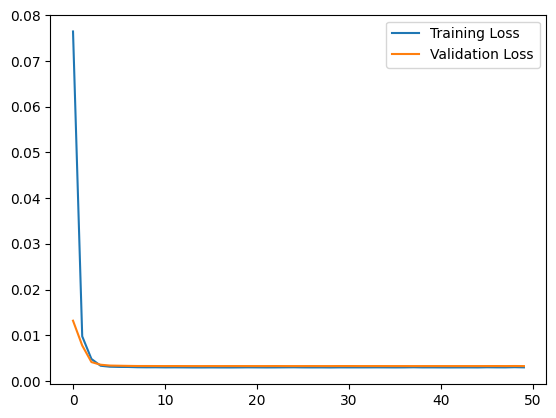

In [ ]:
# tensorboard
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
# Save the plot as an image
#plt.savefig('training_loss_plot_contractiveautoencoder_min_max_normalise.png')

### normal sample reconstruction

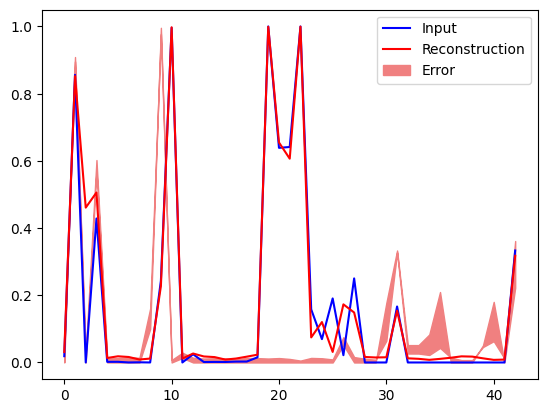

In [ ]:
encoded_data = contractive_autoencoder.encoder(normal_test_data_wl_normalized).numpy()
decoded_data = contractive_autoencoder.decoder(encoded_data).numpy()
#Normal test sample
plt.plot(normal_test_data_wl_normalized[4], 'b')
plt.plot(decoded_data[4], 'r')
plt.fill_between(np.arange(43), decoded_data[1], normal_test_data_wl_normalized[1], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()
#plt.savefig('reconstruction_error_normal_test_data_plot_contractiveautoencoder_min_max_normalise.png')

### anormal sample reconstruction

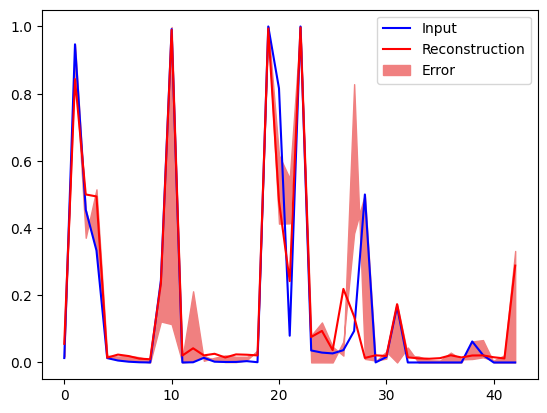

In [ ]:
encoded_data = contractive_autoencoder.encoder(anomalous_test_data_wl_normalized).numpy()
decoded_data = contractive_autoencoder.decoder(encoded_data).numpy()
# anomaly data sample
plt.plot(anomalous_test_data_wl_normalized[3], 'b')
plt.plot(decoded_data[3], 'r')
plt.fill_between(np.arange(43), decoded_data[0], anomalous_test_data_wl_normalized[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
# plt.xlabel("Train loss")
# plt.ylabel("No of examples")
plt.show()
#plt.savefig('reconstruction_error_anormal_test_data_plot_contractiveautoencoder_min_max_normalise.png')

### anomal and normal reconstruction

583/583 [==============================] - 2s 3ms/step


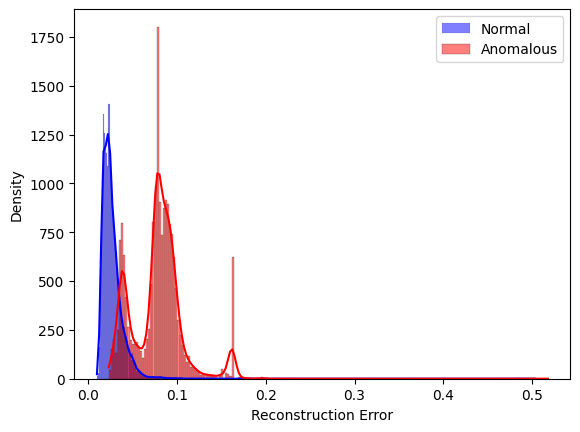

In [ ]:
reconstructions_normal = contractive_autoencoder.predict(normal_test_data_wl_normalized)
reconstructions_anomalous = contractive_autoencoder.predict(anomalous_test_data_wl_normalized)

errors_normal = np.mean(np.abs(reconstructions_normal - normal_test_data_wl_normalized), axis=1)
errors_anomalous = np.mean(np.abs(reconstructions_anomalous - anomalous_test_data_wl_normalized), axis=1)

sns.histplot(errors_normal, label='Normal', kde=True, color='blue')
sns.histplot(errors_anomalous, label='Anomalous', kde=True, color='red')
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.show()
#plt.savefig('contractiveautoencoder_min_max_normalise_density_distruibution_normal_and_anormal.png')

#### normal training data reconstruction

1028/1028 [==============================] - 3s 3ms/step


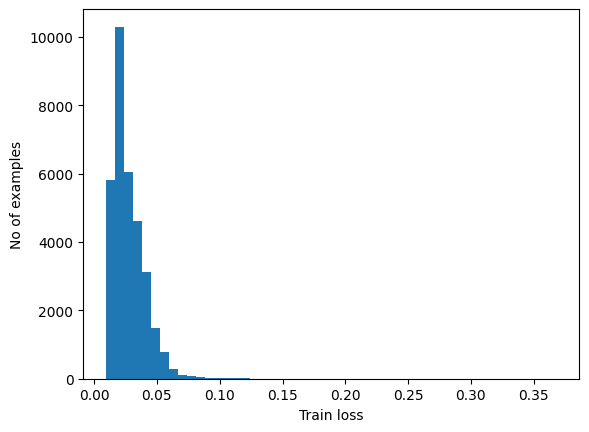

In [38]:
reconstructions = contractive_autoencoder.predict(normal_test_data_wl_normalized)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data_wl_normalized)


plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

#### threshold setting

In [39]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.04173804329037328


#### anormal training data reconstruction

583/583 [==============================] - 2s 3ms/step


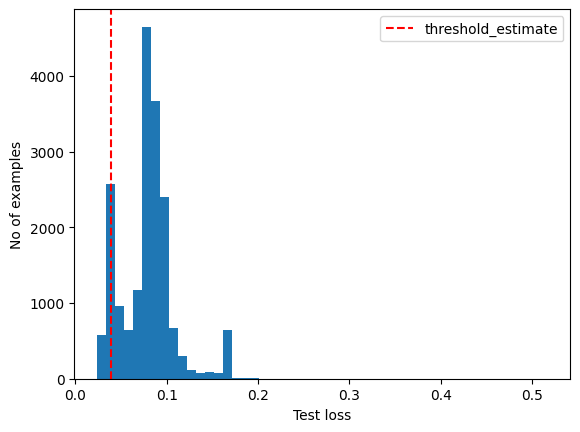

In [ ]:
reconstructions = contractive_autoencoder.predict(anomalous_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_wl_normalized)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
# Add a vertical line at the threshold value
plt.axvline(x=threshold, color='r', linestyle='--', label='threshold_estimate')
plt.legend()
plt.show()
#plt.savefig('testdata_test_loss_plot_contractiveautoencoder_min_max_normalise.png')

#### display threshold anormalie samples

In [ ]:
anomalies_indices = np.where(test_loss > threshold)[0]
num_anomalies_to_display = 5

for i, index in enumerate(anomalies_indices):
    print(f"Anomaly {index} - Index: {index}, Label: {test_labels[index]}")
    print("Sample:", test_data[index])
    print("  ")

    if i == num_anomalies_to_display - 1:
        break

print("Total anomalies in the dataset:", len(anomalies_indices))
print("Total normal in the anomalous_test_data:", len(test_loss) - len(anomalies_indices))


Anomaly 0 - Index: 0, Label: False
Sample: tf.Tensor(
[0.0000000e+00 1.0116630e+00 1.1300000e+02 5.0000000e+00 4.0000000e+00
 1.4000000e+01 1.8000000e+01 1.6840000e+03 1.0168000e+04 3.0642616e+01
 3.1000000e+01 2.9000000e+01 1.2367755e+04 7.5946242e+04 3.0000000e+00
 5.0000000e+00 7.7792389e+01 5.9477470e+01 8.7660996e+03 7.6754478e+03
 2.5500000e+02 1.7749827e+09 1.7782729e+09 2.5500000e+02 6.5800000e-04
 5.3700001e-04 1.2100000e-04 1.2000000e+02 5.6500000e+02 1.0000000e+00
 3.9240000e+03 3.0000000e+00 0.0000000e+00 3.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 4.0000000e+00 1.0000000e+00 0.0000000e+00 6.0000000e+00], shape=(44,), dtype=float32)
  
Anomaly 3 - Index: 3, Label: True
Sample: tf.Tensor(
[1.00e+00 5.00e-06 1.19e+02 2.00e+00 5.00e+00 2.00e+00 0.00e+00 1.14e+02
 0.00e+00 2.00e+05 2.54e+02 0.00e+00 9.12e+07 0.00e+00 0.00e+00 0.00e+00
 5.00e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+

In [ ]:
def predict_anomaly(model, data_instance, threshold):
    data_instance = tf.expand_dims(data_instance, axis=0)

    reconstructed_instance = model(data_instance)

    mse_loss = tf.reduce_mean(tf.square(data_instance - reconstructed_instance))

    if mse_loss > threshold:
        result = "Anomaly"
    else:
        result = "Normal"

    return result

In [ ]:
prediction  = predict_anomaly(contractive_autoencoder, normal_test_data_wl_normalized[0], threshold)
print(f"The data instance is predicted as {prediction}.")

prediction_2  = predict_anomaly(contractive_autoencoder, anomalous_test_data_wl_normalized[9], threshold)
print(f"The data instance is predicted as {prediction}.")

The data instance is predicted as Normal.
The data instance is predicted as Normal.


583/583 [==============================] - 2s 3ms/step


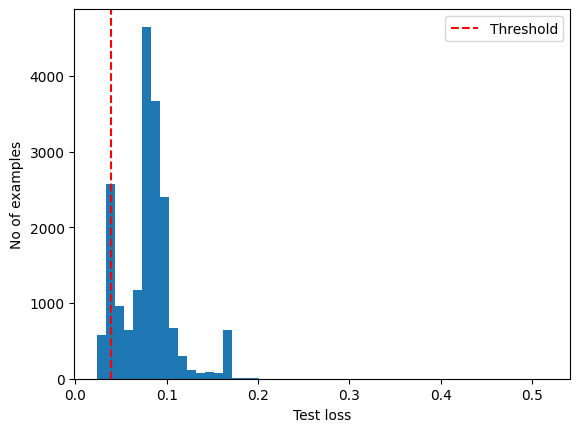

In [ ]:
# 
reconstructions = contractive_autoencoder.predict(anomalous_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_wl_normalized)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
# Add a vertical line at the threshold value
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')

plt.legend()
plt.show()

In [ ]:
anomaly_count = 0
max_display_count = 5
normaly_count = 0

for i, (sample, label) in enumerate(zip(test_data, test_labels)):
    if label == 1:  # Anomaly label
        anomaly_count += 1
    if label == 0:  # nomaly label
        normaly_count += 1   
        
        # Display the first 5 anomalies
        if anomaly_count <= max_display_count:
            print(f"Anomaly {anomaly_count} - Index: {i}, Label: {label}")
            print("Sample:", sample)
            print("------")

print("Total anomalies in the dataset:", anomaly_count)
print("Total nomal in the dataset:", normaly_count)


Anomaly 0 - Index: 0, Label: False
Sample: tf.Tensor(
[0.0000000e+00 1.0116630e+00 1.1300000e+02 5.0000000e+00 4.0000000e+00
 1.4000000e+01 1.8000000e+01 1.6840000e+03 1.0168000e+04 3.0642616e+01
 3.1000000e+01 2.9000000e+01 1.2367755e+04 7.5946242e+04 3.0000000e+00
 5.0000000e+00 7.7792389e+01 5.9477470e+01 8.7660996e+03 7.6754478e+03
 2.5500000e+02 1.7749827e+09 1.7782729e+09 2.5500000e+02 6.5800000e-04
 5.3700001e-04 1.2100000e-04 1.2000000e+02 5.6500000e+02 1.0000000e+00
 3.9240000e+03 3.0000000e+00 0.0000000e+00 3.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 4.0000000e+00 1.0000000e+00 0.0000000e+00 6.0000000e+00], shape=(44,), dtype=float32)
------
Anomaly 5 - Index: 6, Label: False
Sample: tf.Tensor(
[0.00000000e+00 1.28652203e+00 1.13000000e+02 0.00000000e+00
 4.00000000e+00 1.20000000e+01 8.00000000e+00 9.82000000e+02
 7.10000000e+02 1.47685003e+01 2.54000000e+02 2.52000000e+02
 5.60270215e+03 3.86779224e+03 3.00000000e+00 2

In [40]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [41]:
print('contractive autoencoder:')
print("Threshold: ", threshold)
preds = predict(contractive_autoencoder, normal_test_data_wl_normalized, threshold)
print_stats(preds, normal_test_data_labels)

contractive autoencoder:
Threshold:  0.04173804329037328
Accuracy = 0.8708048075460216
Precision = 1.0
Recall = 0.8708048075460216


In [ ]:
# train_data : 30936
# test_data : 7734
# normal train_data : 11720
# normal_test_data : 2975
# anormalous train_data : 19216
# anormalous test_data : 4759
# setting training and test dat

# unsupervised Sparse Autoencoder (Start)

In [67]:
class SparseAnomalyDetector(tf.keras.Model):
    def __init__(self, num_features, encoding_dim, sparsity_factor=1e-2):
        super(SparseAnomalyDetector, self).__init__()

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(num_features,)),
            layers.Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(sparsity_factor)),
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(encoding_dim,)),
            layers.Dense(num_features, activation="sigmoid"),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

num_features = 43
encoding_dim = 8  
sparsity_factor = 1e-2 

sparse_autoencoder = SparseAnomalyDetector(num_features=num_features, encoding_dim=encoding_dim, sparsity_factor=sparsity_factor)


In [68]:
sparse_autoencoder.compile(optimizer='adam', loss='mae')

In [69]:
sparse_autoencoder.build(input_shape=(None, 43))
sparse_autoencoder.summary()

Model: "sparse_anomaly_detector_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 8)                 352       
                                                                 
 sequential_11 (Sequential)  (None, 43)                387       
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [70]:
start = time.time()
history_sparse = sparse_autoencoder.fit(normal_train_data_wl_normalized, normal_train_data_wl_normalized, 
          epochs=200, 
          batch_size=1000,
          validation_data=(normal_test_data_wl_normalized, normal_test_data_wl_normalized),
          shuffle=True)
end_train = time.time()

Epoch 1/200
132/132 [==============================] - 1s 4ms/step - loss: 0.4103 - val_loss: 0.3614
Epoch 2/200
132/132 [==============================] - 0s 3ms/step - loss: 0.2885 - val_loss: 0.2124
Epoch 3/200
132/132 [==============================] - 0s 3ms/step - loss: 0.1799 - val_loss: 0.1616
Epoch 4/200
132/132 [==============================] - 0s 3ms/step - loss: 0.1477 - val_loss: 0.1395
Epoch 5/200
132/132 [==============================] - 0s 3ms/step - loss: 0.1294 - val_loss: 0.1241
Epoch 6/200
132/132 [==============================] - 0s 3ms/step - loss: 0.1159 - val_loss: 0.1120
Epoch 7/200
132/132 [==============================] - 0s 3ms/step - loss: 0.1050 - val_loss: 0.1019
Epoch 8/200
132/132 [==============================] - 0s 3ms/step - loss: 0.0958 - val_loss: 0.0934
Epoch 9/200
132/132 [==============================] - 0s 3ms/step - loss: 0.0883 - val_loss: 0.0870
Epoch 10/200
132/132 [==============================] - 0s 4ms/step - loss: 0.0829 - val_lo

In [71]:
reconstructions = sparse_autoencoder.predict(anomalous_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_wl_normalized)
threshold = np.mean(test_loss) + np.std(test_loss)
preds = predict(sparse_autoencoder, anomalous_test_data_wl_normalized, threshold)

accuracy,precision, f1, recall= print_stats(preds, anomalous_test_data_labels)

end_predict_anomaly= time.time()

results = append_model_reults("sparse_autoencoder_anomaly", results, end_train - start, end_predict_anomaly - end_train, accuracy, recall, precision, f1)

584/584 [==============================] - 1s 951us/step


c:\Users\Alexej\miniconda3\envs\simple-htr-gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alexej\miniconda3\envs\simple-htr-gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
reconstructions = sparse_autoencoder.predict(normal_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, normal_test_data_wl_normalized)
threshold = np.mean(test_loss) + np.std(test_loss)
preds = predict(sparse_autoencoder, normal_test_data_wl_normalized, threshold)

accuracy, precision, f1, recall= print_stats(preds, normal_test_data_labels)
end_predict_normal = time.time()


results = append_model_reults("sparse_autoencoder_normal", results, end_train - start, end_predict_normal - end_train, accuracy, recall, precision, f1)

1028/1028 [==============================] - 1s 939us/step


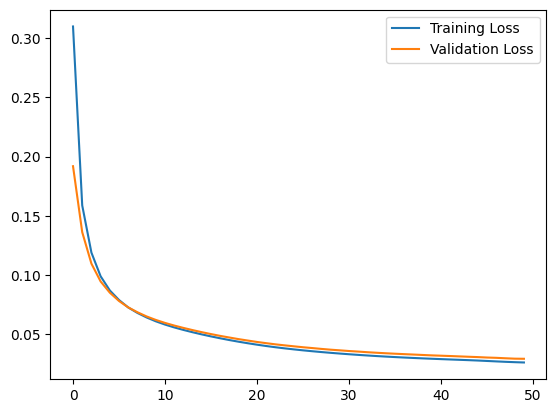

In [ ]:
# tensorboard
plt.plot(history_sparse.history["loss"], label="Training Loss")
plt.plot(history_sparse.history["val_loss"], label="Validation Loss")
plt.legend()

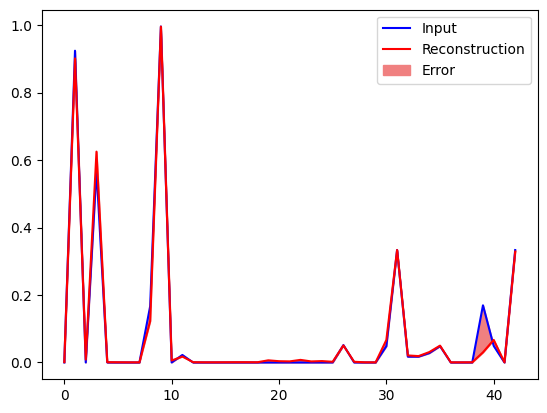

In [ ]:
encoded_data = sparse_autoencoder.encoder(normal_test_data_wl_normalized).numpy()
decoded_data = sparse_autoencoder.decoder(encoded_data).numpy()
#Normal test sample
plt.plot(normal_test_data_wl_normalized[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(43), decoded_data[0], normal_test_data_wl_normalized[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

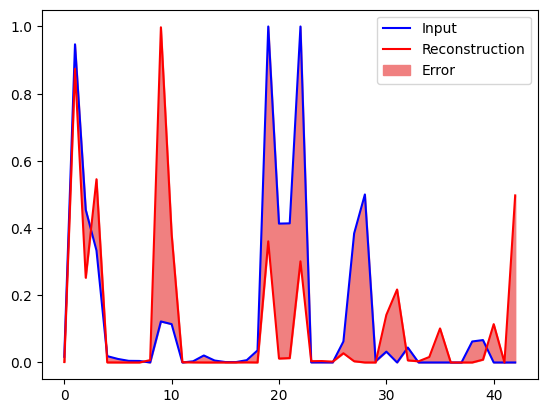

In [ ]:
encoded_data = sparse_autoencoder.encoder(anomalous_test_data_wl_normalized).numpy()
decoded_data = sparse_autoencoder.decoder(encoded_data).numpy()
# anomaly data sample
plt.plot(anomalous_test_data_wl_normalized[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(43), decoded_data[0], anomalous_test_data_wl_normalized[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

4119/4119 [==============================] - 8s 2ms/step


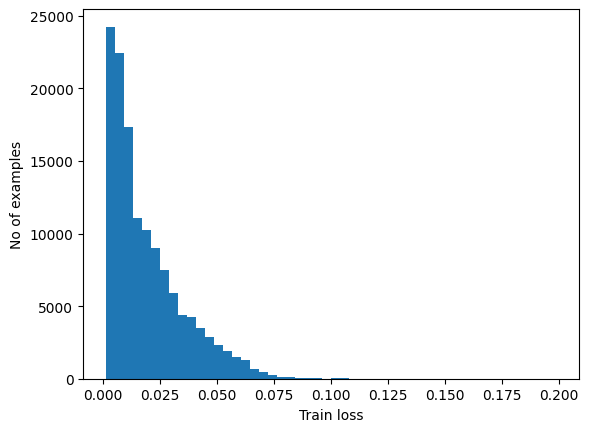

In [ ]:
reconstructions = sparse_autoencoder.predict(normal_train_data_wl_normalized)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data_wl_normalized)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

583/583 [==============================] - 1s 2ms/step
Threshold:  0.03547237


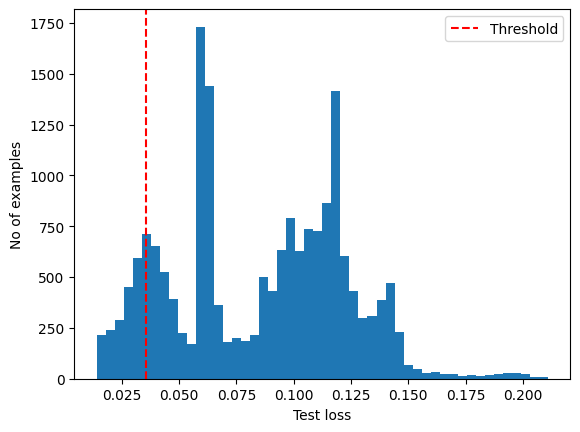

In [ ]:
reconstructions = sparse_autoencoder.predict(anomalous_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_wl_normalized)

# threshold setting other methods can be used 
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
# Add a vertical line at the threshold value
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')

plt.legend()
plt.show()

In [ ]:
def predict_anomaly(model, data_instance, threshold):
    data_instance = tf.expand_dims(data_instance, axis=0)

    reconstructed_instance = model(data_instance)

    mse_loss = tf.reduce_mean(tf.square(data_instance - reconstructed_instance))

    if mse_loss > threshold:
        result = "Anomaly"
    else:
        result = "Normal"

    return result

In [ ]:
prediction  = predict_anomaly(sparse_autoencoder, normal_test_data_wl_normalized[0], threshold)
print(f"The data instance is predicted as {prediction}.")

The data instance is predicted as Normal.


In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
print('sparse autoencoder')
print("Threshold: ", threshold)
preds = predict(sparse_autoencoder, normal_test_data_wl_normalized, threshold)
print_stats(preds, normal_test_data_labels)

sparse autoencoder
Threshold:  0.03547237
Accuracy = 0.7958892030770166
Precision = 1.0
Recall = 0.7958892030770166


# unsupervised LOF( Local Outlier Factor) Algorithmus zur Anomalieerkennung

Predicted Labels on training set: [0 0 0 0 0 0 0 0 0 0]
Predicted Labels on Test Set: [0 0 0 0 0 0 0 0 0 0]


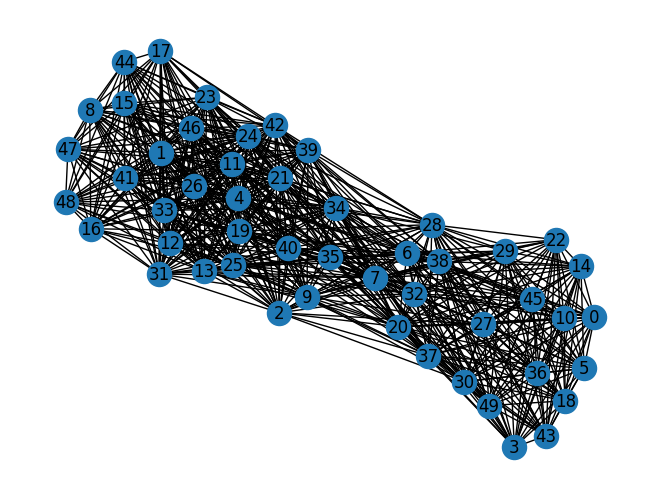

In [ ]:

df = dataframe

X = df.iloc[:, 1:]  # Features
n_neighbors=20


X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

lof = LocalOutlierFactor(n_neighbors, contamination=0.05) 
y_pred_train = lof.fit_predict(X_train)

y_pred_binary_train = np.where(y_pred_train == -1, 1, 0)

print("Predicted Labels on training set:", y_pred_binary_train[:10])


y_pred_test = lof.fit_predict(X_test)

y_pred_binary_test = np.where(y_pred_test == -1, 1, 0)

print("Predicted Labels on Test Set:", y_pred_binary_test[:10])


sample_size = 50
sampled_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
sampled_graph = kneighbors_graph(X_train.iloc[sampled_indices], n_neighbors)

dense_sampled_graph = sampled_graph.toarray()

G = nx.Graph(dense_sampled_graph)

nx.draw(G, with_labels=True)
plt.show()

In [ ]:
original_data_point_index = 32

corresponding_datapoint = X_train.iloc[original_data_point_index]

is_anomaly = y_pred_binary[sampled_indices[original_data_point_index]] == 1

print(f"Corresponding Datapoint for Graph Point {original_data_point_index}:\n{corresponding_datapoint}")
print(f"Is Anomaly: {is_anomaly}")


Corresponding Datapoint for Graph Point 32:
dur                  1.100000e-05
proto                1.170000e+02
service              0.000000e+00
state                4.000000e+00
spkts                2.000000e+00
dpkts                0.000000e+00
sbytes               1.882000e+03
dbytes               0.000000e+00
rate                 9.090909e+04
sttl                 2.540000e+02
dttl                 0.000000e+00
sload                6.843636e+08
dload                0.000000e+00
sloss                0.000000e+00
dloss                0.000000e+00
sinpkt               1.100000e-02
dinpkt               0.000000e+00
sjit                 0.000000e+00
djit                 0.000000e+00
swin                 0.000000e+00
stcpb                0.000000e+00
dtcpb                0.000000e+00
dwin                 0.000000e+00
tcprtt               0.000000e+00
synack               0.000000e+00
ackdat               0.000000e+00
smean                9.410000e+02
dmean                0.000000e+00
tran

## unsupervised Clustering K-Means

In [ ]:
def optimise_k_means(data, max_k):
    means =[]
    inertias = []
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias,'o-')
    plt.ylabel('Inertia')
    plt.xlabel('number of clusters')
    plt.grid(True)
    plt.show()

def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, marker='o')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [ ]:
data_for_clustering = dataframe
data_for_clustering = data_for_clustering.drop('label', axis=1)   
max_k = 10

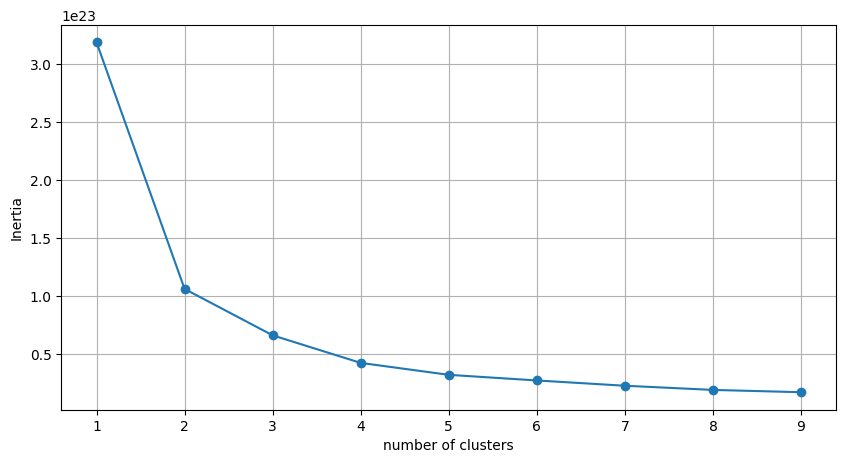

In [ ]:
# Perform k-means clustering
optimise_k_means(data_for_clustering, max_k)

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k,n_init=10)

In [ ]:
cluster_labels = kmeans.fit_predict(data_for_clustering)

In [ ]:
# Use PCA for dimensionality reduction
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_for_clustering)


In [ ]:
data_for_clustering

dur  proto  service  state  spkts  dpkts   sbytes  dbytes  \
0      0.000011  117.0      0.0    4.0    2.0    0.0    496.0     0.0   
1      0.000008  117.0      0.0    4.0    2.0    0.0   1762.0     0.0   
2      0.000005  117.0      0.0    4.0    2.0    0.0   1068.0     0.0   
3      0.000006  117.0      0.0    4.0    2.0    0.0    900.0     0.0   
4      0.000010  117.0      0.0    4.0    2.0    0.0   2126.0     0.0   
...         ...    ...      ...    ...    ...    ...      ...     ...   
82327  0.000005  117.0      0.0    4.0    2.0    0.0    104.0     0.0   
82328  1.106101  111.0      0.0    3.0   20.0    8.0  18062.0   354.0   
82329  0.000000    6.0      0.0    4.0    1.0    0.0     46.0     0.0   
82330  0.000000    6.0      0.0    4.0    1.0    0.0     46.0     0.0   
82331  0.000009  117.0      0.0    4.0    2.0    0.0    104.0     0.0   

                rate   sttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0       90909.090200  254.0  ...               1.0               1.0   
1      125000.000300  254.0  ...               1.0               1.0   
2      200000.005100  254.0  ...               1.0               1.0   
3      166666.660800  254.0  ...               2.0               1.0   
4      100000.002500  254.0  ...               2.0               1.0   
...              ...    ...  ...               ...               ...   
82327  200000.005100  254.0  ...               1.0               1.0   
82328      24.410067  254.0  ...               1.0               1.0   
82329       0.000000    0.0  ...               1.0               1.0   
82330       0.000000    0.0  ...               1.0               1.0   
82331  111111.107200  254.0  ...               1.0               1.0   

       ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  \
0                 2.0           0.0         0.0               0.0         1.0   
1                 2.0           0.0         0.0               0.0         1.0   
2                 3.0           0.0         0.0               0.0         1.0   
3                 3.0           0.0         0.0               0.0         2.0   
4                 3.0           0.0         0.0               0.0         2.0   
...               ...           ...         ...               ...         ...   
82327             2.0           0.0         0.0               0.0         2.0   
82328             1.0           0.0         0.0               0.0         3.0   
82329             1.0           0.0         0.0               0.0         1.0   
82330             1.0           0.0         0.0               0.0         1.0   
82331             1.0           0.0         0.0               0.0         1.0   

       ct_srv_dst  is_sm_ips_ports  attack_cat  
0             2.0              0.0         6.0  
1             2.0              0.0         6.0  
2             3.0              0.0         6.0  
3             3.0              0.0         6.0  
4             3.0              0.0         6.0  
...           ...              ...         ...  
82327         1.0              0.0         6.0  
82328         2.0              0.0         6.0  
82329         1.0              1.0         6.0  
82330         1.0              1.0         6.0  
82331         1.0              0.0         6.0  

[82332 rows x 43 columns]

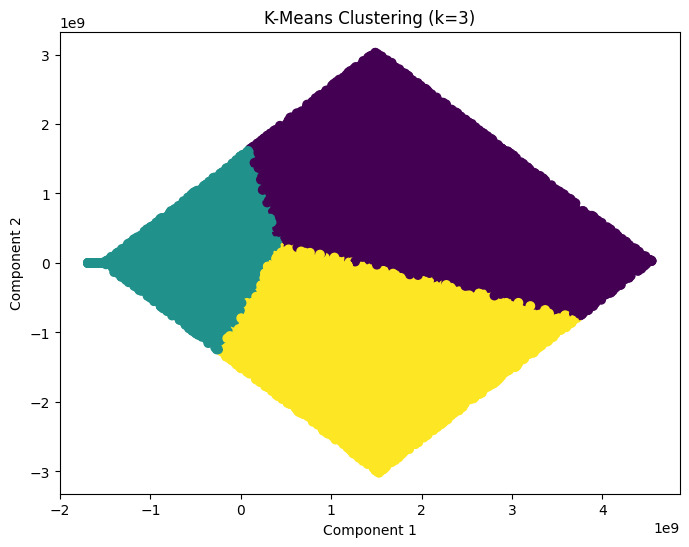

In [ ]:
plot_clusters(principal_components, cluster_labels, f'K-Means Clustering (k={optimal_k})')

In [ ]:

data_for_clustering = dataframe.values

pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_for_clustering)

feature_names = dataframe.columns
component_names = [f' Component {i+1}' for i in range(pca.n_components_)]

for i, component in enumerate(pca.components_):
    top_features_idx = component.argsort()[-5:][::-1] 
    top_features = feature_names[top_features_idx]
    print(f'\n{component_names[i]}:')
    for j, feature in enumerate(top_features):
        print(f'{j+1}. {feature}')



 Component 1:
1. stcpb
2. dtcpb
3. dload
4. dbytes
5. sbytes

 Component 2:
1. dtcpb
2. dload
3. sbytes
4. smean
5. spkts

 Component 3:
1. sload
2. stcpb
3. dtcpb
4. rate
5. smean


In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10)
cluster_labels = kmeans.fit_predict(data_for_clustering)

silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")


Silhouette Score for k=3: 0.8603321547099949


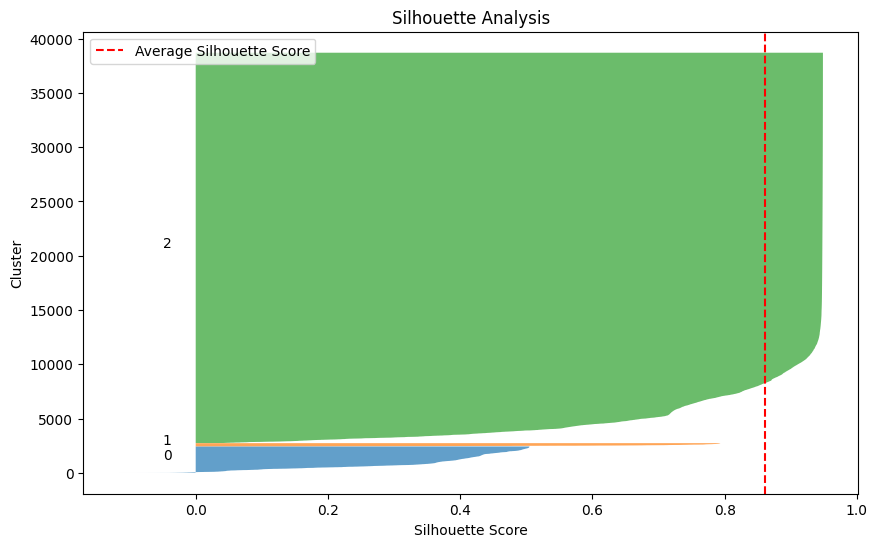

In [ ]:

silhouette_scores = silhouette_samples(data_for_clustering, cluster_labels)

average_silhouette_score = silhouette_avg

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_k):
    cluster_i_silhouette_values = silhouette_scores[cluster_labels == i]
    cluster_i_silhouette_values.sort()
    size_cluster_i = cluster_i_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.title("Silhouette Analysis")
plt.axvline(x=average_silhouette_score, color="red", linestyle="--", label="Average Silhouette Score")
plt.legend()
plt.show()

In [ ]:
for i, score in enumerate(silhouette_scores):
    print(f"Instance {i}: Silhouette Score = {score}") # low score potential anomalies

Instance 0: Silhouette Score = 0.9473556484550222
Instance 1: Silhouette Score = 0.9471219204980308
Instance 2: Silhouette Score = 0.9474668141161865
Instance 3: Silhouette Score = 0.9485964455048684
Instance 4: Silhouette Score = 0.9482416822806639
Instance 5: Silhouette Score = 0.9481171557395981
Instance 6: Silhouette Score = 0.9477432962790937
Instance 7: Silhouette Score = 0.9480491519927958
Instance 8: Silhouette Score = 0.9480460549839624
Instance 9: Silhouette Score = 0.9485377250582824
Instance 10: Silhouette Score = 0.9481770503608687
Instance 11: Silhouette Score = 0.948268297461215
Instance 12: Silhouette Score = 0.9484693104038588
Instance 13: Silhouette Score = 0.9477293252807324
Instance 14: Silhouette Score = 0.948217278671148
Instance 15: Silhouette Score = 0.9482143484589338
Instance 16: Silhouette Score = 0.9478172564958908
Instance 17: Silhouette Score = 0.9472748228562499
Instance 18: Silhouette Score = 0.9484357791239992
Instance 19: Silhouette Score = 0.948354186

## unsupervised clustering with Isolation Forest

In [ ]:

X = encoded_dataframe.drop('label', axis=1)  
y_true = encoded_dataframe['label']  

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
iso_forest.fit(X_train_std)

y_pred = iso_forest.predict(X_test_std)

y_pred[y_pred == 1] = 0  
y_pred[y_pred == -1] = 1  

# Evaluate the performance
classification_rep = classification_report(y_test, y_pred)

print("\nClassification Report:\n", classification_rep)



Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.93      0.74      4793
           1       0.22      0.03      0.05      2941

    accuracy                           0.59      7734
   macro avg       0.42      0.48      0.40      7734
weighted avg       0.46      0.59      0.48      7734



In [ ]:
print(X.columns)


Index(['sttl', 'ct_dst_sport_ltm', 'ct_src_dport_ltm', 'rate', 'ct_state_ttl',
       'ct_srv_dst', 'ct_srv_src', 'ct_dst_src_ltm', 'ct_src_ltm',
       'ct_dst_ltm', 'sload', 'sbytes', 'sloss', 'proto_arp', 'proto_tcp',
       'proto_udp', 'service_-', 'service_ftp', 'service_ftp-data',
       'service_http', 'service_smtp', 'state_ACC', 'state_FIN'],
      dtype='object')


In [ ]:
#encoded_dataframe = encoded_dataframe.drop('kmeans_3', axis=1)


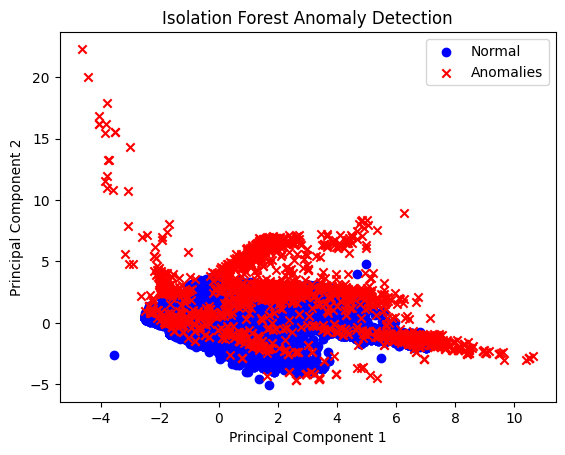

In [ ]:


X = encoded_dataframe.drop('label', axis=1)

y_true = encoded_dataframe['label']  # True labels

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

iso_forest = IsolationForest(contamination=0.05, random_state=42) 
iso_forest.fit(X_std)

y_pred = iso_forest.fit_predict(X_std)

y_pred_binary = (y_pred == -1).astype(int)

y_pred[y_pred == 1] = 0  
y_pred[y_pred == -1] = 1  

plt.scatter(X_pca[y_pred == 0, 0], X_pca[y_pred == 0, 1], c='blue', label='Normal')
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], c='red', marker='x', label='Anomalies')

plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
encoded_dataframe.insert(1, 'predicted_label', y_pred_binary)
encoded_dataframe.sample(10)

label  predicted_label  sttl  ct_dst_sport_ltm  ct_src_dport_ltm  \
67375      0                0   254                 2                 2   
24870      0                0    31                 1                 1   
42709      0                0   254                 2                 2   
78750      0                0   254                 1                 1   
75392      0                0    62                 1                 1   
65220      1                0    62                 1                 1   
24479      0                0    31                 1                 1   
11029      1                1   254                 2                 2   
44411      1                0   254                 1                 1   
29218      0                0    31                 1                 1   

              rate  ct_state_ttl  ct_srv_dst  ct_srv_src  ct_dst_src_ltm  ...  \
67375    17.578254             1           3           3               3  ...   
24870    36.435509             0           7           6               2  ...   
42709    25.137363             1           3           3               3  ...   
78750    23.519905             1           2           2               2  ...   
75392    28.475810             1           2           2               2  ...   
65220    75.525318             1           1           2               1  ...   
24479  5843.543529             0           5           4               2  ...   
11029    24.656162             1           2           2               3  ...   
44411    16.270412             1           2           4               1  ...   
29218  6747.535849             0           3           8               1  ...   

       proto_arp  proto_tcp  proto_udp  service_-  service_ftp  \
67375        0.0        1.0        0.0        1.0          0.0   
24870        0.0        1.0        0.0        1.0          0.0   
42709        0.0        1.0        0.0        1.0          0.0   
78750        0.0        1.0        0.0        1.0          0.0   
75392        0.0        1.0        0.0        0.0          0.0   
65220        0.0        1.0        0.0        1.0          0.0   
24479        0.0        1.0        0.0        1.0          0.0   
11029        0.0        1.0        0.0        1.0          0.0   
44411        0.0        1.0        0.0        1.0          0.0   
29218        0.0        1.0        0.0        1.0          0.0   

       service_ftp-data  service_http  service_smtp  state_ACC  state_FIN  
67375               0.0           0.0           0.0        0.0        1.0  
24870               0.0           0.0           0.0        0.0        1.0  
42709               0.0           0.0           0.0        0.0        1.0  
78750               0.0           0.0           0.0        0.0        1.0  
75392               0.0           1.0           0.0        0.0        1.0  
65220               0.0           0.0           0.0        0.0        1.0  
24479               0.0           0.0           0.0        0.0        1.0  
11029               0.0           0.0           0.0        0.0        1.0  
44411               0.0           0.0           0.0        0.0        1.0  
29218               0.0           0.0           0.0        0.0        1.0  

[10 rows x 25 columns]

In [ ]:

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=X.columns, index=['Principal Component 1', 'Principal Component 2'])

print(loadings_df)


Loadings:
                           sttl  ct_dst_sport_ltm  ct_src_dport_ltm      rate  \
Principal Component 1 -0.231405          0.034551          0.306454  0.284954   
Principal Component 2 -0.438670         -0.163163         -0.184337  0.272504   

                       ct_state_ttl  ct_srv_dst  ct_srv_src  ct_dst_src_ltm  \
Principal Component 1     -0.359215    0.395691    0.379151        0.220275   
Principal Component 2     -0.316149   -0.130570   -0.169444       -0.273635   

                       ct_src_ltm  ct_dst_ltm  ...  proto_arp  proto_tcp  \
Principal Component 1    0.308430    0.304542  ...       -0.0       -0.0   
Principal Component 2    0.035664    0.053021  ...       -0.0       -0.0   

                       proto_udp  service_-  service_ftp  service_ftp-data  \
Principal Component 1       -0.0   0.195194    -0.072302          0.021656   
Principal Component 2       -0.0  -0.385805     0.056656          0.181072   

                       service_http  service

# Zeitreihe Datensatz

In [4]:
# Download the dataset
dataframe_2 = pd.read_csv('./data/creditcard.csv')
dataframe_2.head(5) 

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
x = dataframe_2.drop('Class', axis=1)

x_anomalies = x[dataframe_2['Class'] == 1]

X = x[dataframe_2['Class'] == 0]


In [ ]:
x_anomalies

Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V20       V21       V22  \
541    -2.537387  1.391657 -2.770089  ...  0.126911  0.517232 -0.035049   
623     0.325574 -0.067794 -0.270953  ...  2.102339  0.661696  0.435477   
4920    0.562320 -0.399147 -0.238253  ... -0.430022 -0.294166 -0.932391   
6108   -3.496197 -0.248778 -0.247768  ... -0.171608  0.573574  0.176968   
6329    1.713445 -0.496358 -1.282858  ...  0.009061 -0.379068 -0.704181   
...          ...       ...       ...  ...       ...       ...       ...   
279863 -0.882850  0.697211 -2.064945  ...  1.252967  0.778584 -0.319189   
280143 -1.413170  0.248525 -1.127396  ...  0.226138  0.370612  0.028234   
280149 -2.234739  1.210158 -0.652250  ...  0.247968  0.751826  0.834108   
281144 -2.208002  1.058733 -1.632333  ...  0.306271  0.583276 -0.269209   
281674  0.223050 -0.068384  0.577829  ... -0.017652 -0.164350 -0.295135   

             V23       V24       V25       V26       V27       V28  Amount  
541    -0.465211  0.320198  0.044519  0.177840  0.261145 -0.143276    0.00  
623     1.375966 -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00  
4920    0.172726 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93  
6108   -0.436207 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00  
6329   -0.656805 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00  
...          ...       ...       ...       ...       ...       ...     ...  
279863  0.639419 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00  
280143 -0.145640 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76  
280149  0.190944  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89  
281144 -0.456108 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00  
281674 -0.072173 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53  

[492 rows x 30 columns]

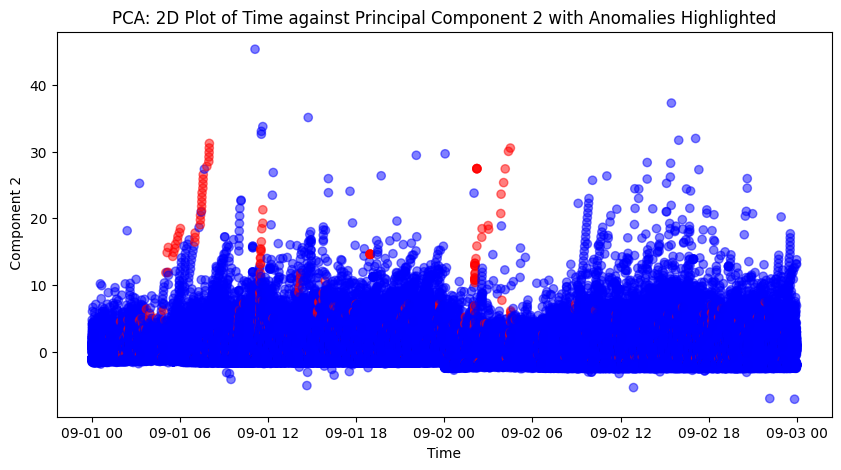

In [ ]:
# Starting date
start_date = pd.to_datetime('1970-01-01')

offset = pd.DateOffset(years=43, months=8)

new_date = start_date + offset

seconds_data =  x['Time']

new_dates = [new_date + timedelta(seconds=seconds) for seconds in seconds_data]


features_for_pca = x.drop('Time', axis=1)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_for_pca)

plt.figure(figsize=(20, 5))

# Scatter plot with anomalies in red
plt.scatter(new_dates, reduced_data[:, 1], c=np.where(dataframe_2['Class'] == 1, 'red', 'blue'), marker='o', alpha=0.5)

plt.title('PCA: 2D Plot of Time against Principal Component 2 with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel(' Component 2')
plt.show()


In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

In [ ]:
sequence_length = 12
X_sequences = create_sequences(X.values, sequence_length)
#y_sequences = y[sequence_length - 1:]
x_anomalies = create_sequences(x_anomalies.values, sequence_length)

In [ ]:
X_train, X_test = train_test_split(X_sequences, test_size=0.2, random_state=42)


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
x_anomalies_scaled = scaler.transform(x_anomalies.reshape(-1, x_anomalies.shape[-1])).reshape(x_anomalies.shape)

In [ ]:
num_features = X_train.shape[-1]
sparsity_factor = 1e-3
filters = 32
kernel_size = 3
input_shape = (sequence_length, num_features)

In [ ]:
print(X_train.shape)

(227443, 12, 30)


In [ ]:
print(input_shape)

(12, 30)


### Sparse convolutional Autoencoder

In [ ]:
class SparseConvAutoencoder(tf.keras.Model):
    def __init__(self, filters, kernel_size, input_shape, sparsity_factor):
        super(SparseConvAutoencoder, self).__init__()

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=input_shape),
            layers.Conv1D(filters=filters, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                          activity_regularizer=regularizers.l1(sparsity_factor)),
            layers.Conv1D(filters=filters // 2, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                          activity_regularizer=regularizers.l1(sparsity_factor)),
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(filters=filters // 2, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                                   activity_regularizer=regularizers.l1(sparsity_factor)),
            layers.Conv1DTranspose(filters=filters, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                                   activity_regularizer=regularizers.l1(sparsity_factor)),
            layers.Conv1DTranspose(num_features, kernel_size=kernel_size, padding="same"),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
sparse_conv_autoencoder = SparseConvAutoencoder(filters=filters, kernel_size=kernel_size,
                                                input_shape=input_shape, sparsity_factor=sparsity_factor)
sparse_conv_autoencoder.build((None,) + input_shape)

sparse_conv_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
sparse_conv_autoencoder.summary()

Model: "sparse_conv_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 3, 16)             4464      
                                                                 
 sequential_3 (Sequential)   (None, 12, 30)            5262      
                                                                 
Total params: 9726 (37.99 KB)
Trainable params: 9726 (37.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_sparse_convolutional = sparse_conv_autoencoder.fit(X_train_scaled, X_train_scaled, 
                                                           epochs=20, 
                                                           batch_size=1000,
                                                           shuffle=True, 
                                                           validation_data=(X_test_scaled, X_test_scaled)
)


Epoch 1/20
228/228 [==============================] - 7s 23ms/step - loss: 0.0849 - val_loss: 0.0252
Epoch 2/20
228/228 [==============================] - 5s 20ms/step - loss: 0.0199 - val_loss: 0.0152
Epoch 3/20
228/228 [==============================] - 5s 21ms/step - loss: 0.0126 - val_loss: 0.0111
Epoch 4/20
228/228 [==============================] - 5s 21ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 5/20
228/228 [==============================] - 5s 20ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 6/20
228/228 [==============================] - 5s 21ms/step - loss: 0.0087 - val_loss: 0.0084
Epoch 7/20
228/228 [==============================] - 5s 21ms/step - loss: 0.0082 - val_loss: 0.0079
Epoch 8/20
228/228 [==============================] - 5s 21ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 9/20
228/228 [==============================] - 5s 20ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 10/20
228/228 [==============================] - 5s 20ms/step - loss: 0.0069 - val_lo

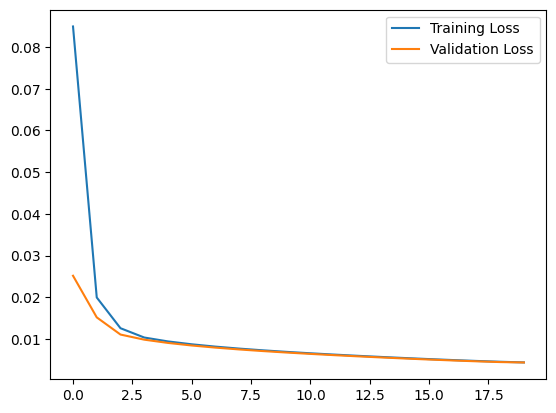

In [ ]:
plt.plot(history_sparse_convolutional.history["loss"], label="Training Loss")
plt.plot(history_sparse_convolutional.history["val_loss"], label="Validation Loss")
plt.legend()

7108/7108 [==============================] - 21s 3ms/step


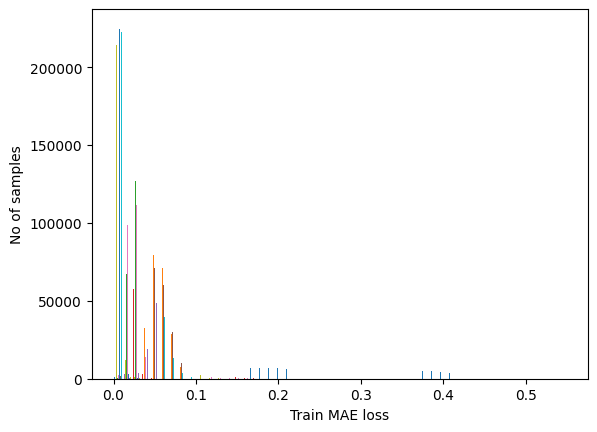

Reconstruction error threshold:  0.5491040499184199


In [ ]:
x_train_pred = sparse_conv_autoencoder.predict(X_train_scaled)
train_mae_loss = np.mean(np.abs(x_train_pred - X_train_scaled), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

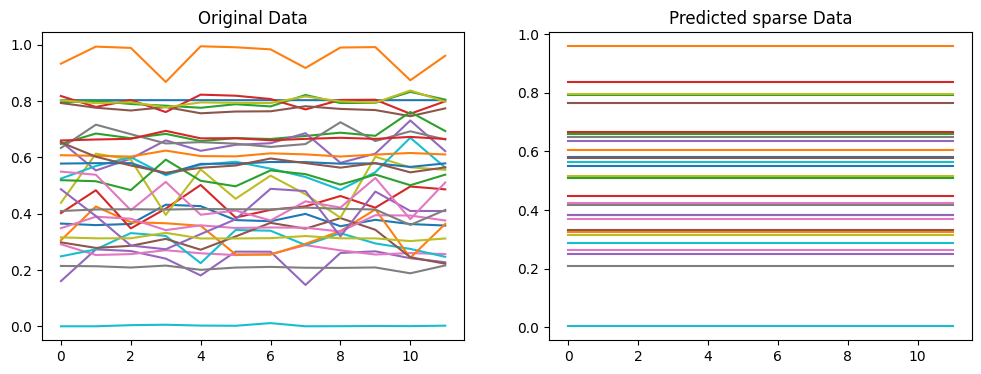

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(X_train_scaled[0])
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.plot(x_train_pred[0])
plt.title('Predicted sparse Data')

plt.show()

16/16 [==============================] - 0s 5ms/step


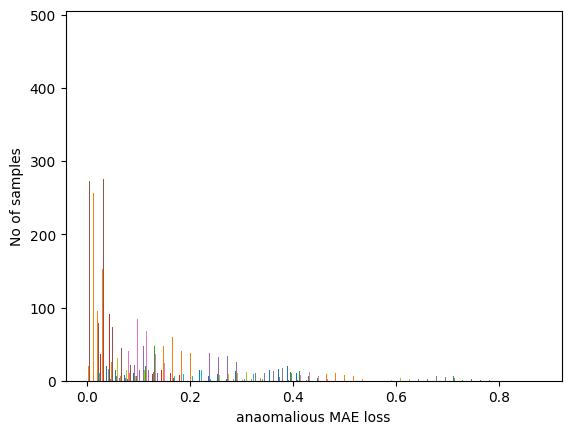

In [ ]:
# Get train MAE loss.
x_anomalies_pred = sparse_conv_autoencoder.predict(x_anomalies_scaled)
anomalies_mae_loss = np.mean(np.abs(x_anomalies_pred - x_anomalies_scaled), axis=1)

plt.hist(anomalies_mae_loss, bins=50)
plt.xlabel("anaomalious MAE loss")
plt.ylabel("No of samples")
plt.show()


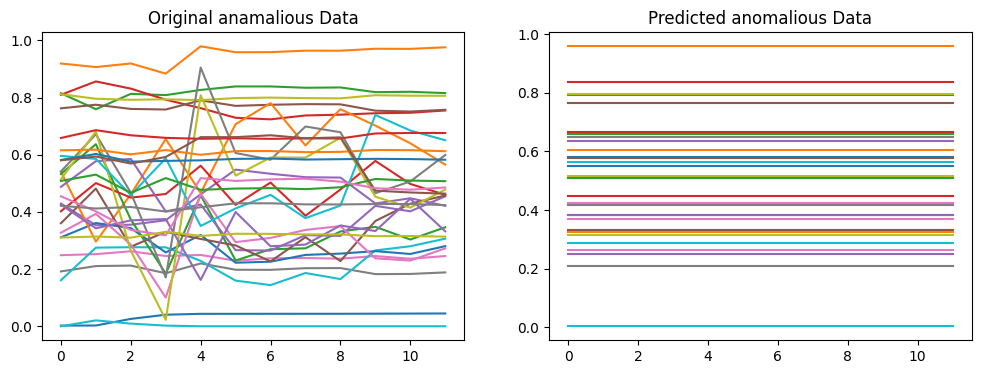

In [ ]:
plt.figure(figsize=(12, 4))

# Subplot for original data
plt.subplot(1, 2, 1)
plt.plot(x_anomalies_scaled[0])
plt.title('Original anamalious Data')

# Subplot for predicted data
plt.subplot(1, 2, 2)
plt.plot(x_anomalies_pred[0])
plt.title('Predicted anomalious Data')

plt.show()

### contractive convolutional Autoencoder

In [ ]:
input_shape = (sequence_length, num_features)

In [ ]:
class ContractiveConvAnomalyDetector(tf.keras.Model):
    def __init__(self, lam):
        super(ContractiveConvAnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=input_shape),
            layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=8, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization()
        ])

        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(filters=8, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=30, kernel_size=3, activation="sigmoid", padding="same"), 
        ])
        self.lam = lam  # Regularization strength of autoencoder

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def compute_jacobian(self, x):
        x = tf.convert_to_tensor(x)  
    
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            encoded = self.encoder(x)
    
        jacobian = tape.jacobian(encoded, x)
        
        return jacobian

    def contractive_loss(self, x, x_hat, jacobian):
        mse_loss = tf.reduce_mean(tf.square(x - x_hat))
        squared_jacobian = tf.square(jacobian)
        frobenius_norm = tf.sqrt(tf.reduce_sum(squared_jacobian))        
        total_loss = mse_loss + self.lam * frobenius_norm
        return total_loss   

In [ ]:
def train_step(self, data):
    x, _ = data
    with tf.GradientTape() as tape:
        x_hat = self(x)
        jacobian = self.compute_jacobian(x)
        loss = self.contractive_loss(x, x_hat, jacobian)
        
    gradients = tape.gradient(loss, self.trainable_variables)
    
    clipped_gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)        
    self.optimizer.apply_gradients(zip(clipped_gradients, self.trainable_variables))

    return {"loss": loss}

In [ ]:
contractive_convolutional_autoencoder = ContractiveConvAnomalyDetector(lam=1e-8)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000,
    decay_rate=0.09,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

contractive_convolutional_autoencoder.compile(optimizer=optimizer, loss='mse')


In [ ]:
contractive_convolutional_autoencoder.build(input_shape=(None, 12, 30))
contractive_convolutional_autoencoder.summary()


Model: "contractive_conv_anomaly_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 12, 8)             17848     
                                                                 
 sequential_1 (Sequential)   (None, 12, 30)            14646     
                                                                 
Total params: 32494 (126.93 KB)
Trainable params: 31950 (124.80 KB)
Non-trainable params: 544 (2.12 KB)
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True)

history_convolutional_contractive = contractive_convolutional_autoencoder.fit(X_train_scaled, X_train_scaled, 
                                                                              epochs=10, 
                                                                              batch_size=1000, 
                                                                              shuffle=True, 
                                                                              validation_data=(X_test_scaled, X_test_scaled),
                                                                              callbacks=[early_stopping])



Epoch 1/10

228/228 [==============================] - 26s 92ms/step - loss: 0.0594 - val_loss: 0.0206
Epoch 2/10
228/228 [==============================] - 19s 83ms/step - loss: 0.0178 - val_loss: 0.0071
Epoch 3/10
228/228 [==============================] - 19s 84ms/step - loss: 0.0078 - val_loss: 0.0054
Epoch 4/10
228/228 [==============================] - 19s 83ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 5/10
228/228 [==============================] - 19s 83ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 6/10
228/228 [==============================] - 19s 83ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 7/10
228/228 [==============================] - 19s 83ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 8/10
228/228 [==============================] - 19s 83ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 9/10
228/228 [==============================] - 19s 84ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 10/10
228/228 [==============================] - 19s 84ms/step - loss: 0.00

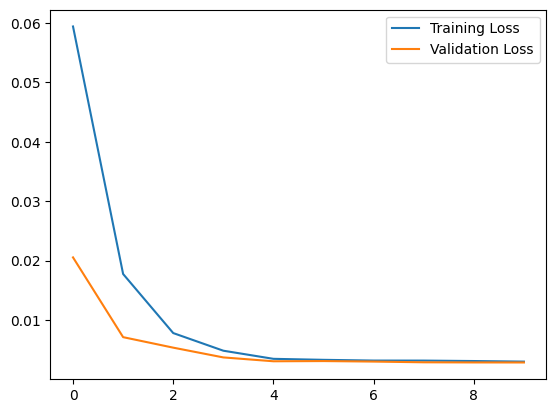

In [ ]:
plt.plot(history_convolutional_contractive.history["loss"], label="Training Loss")
plt.plot(history_convolutional_contractive.history["val_loss"], label="Validation Loss")
plt.legend()

7108/7108 [==============================] - 35s 5ms/step


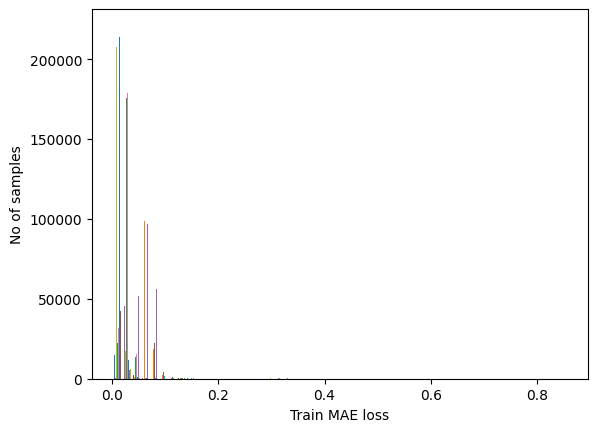

Reconstruction error threshold:  0.034507412108349164


In [ ]:
# Get train MAE loss.
x_train_pred = contractive_convolutional_autoencoder.predict(X_train_scaled)
train_mae_loss = np.mean(np.abs(x_train_pred - X_train_scaled), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold_contractive = np.mean(train_mae_loss)
print("Reconstruction error threshold: ", threshold_contractive)

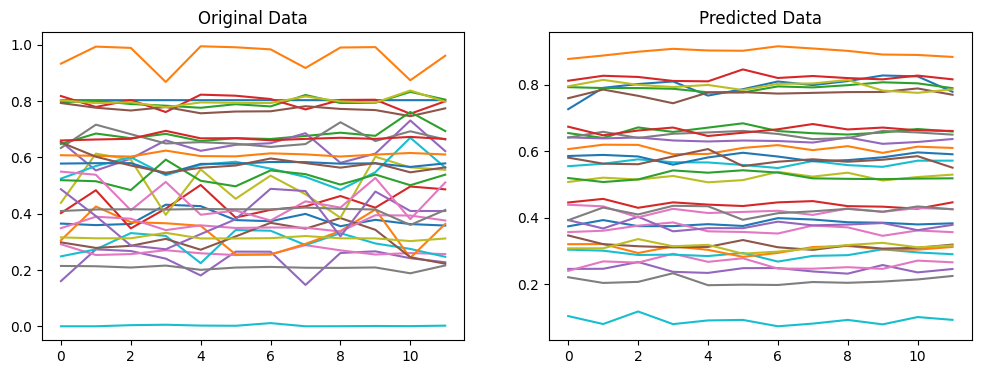

In [ ]:
plt.figure(figsize=(12, 4))

# Subplot for original data
plt.subplot(1, 2, 1)
plt.plot(X_train_scaled[0])
plt.title('Original Data')

# Subplot for predicted data
plt.subplot(1, 2, 2)
plt.plot(x_train_pred[0])
plt.title('Predicted Data')

plt.show()

16/16 [==============================] - 0s 7ms/step


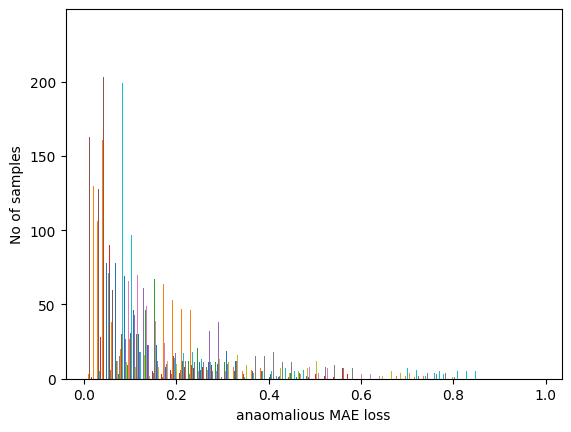

In [ ]:
# Get train MAE loss.
x_anomalies_pred = contractive_convolutional_autoencoder.predict(x_anomalies_scaled)
anomalies_mae_loss = np.mean(np.abs(x_anomalies_pred - x_anomalies_scaled), axis=1)

plt.hist(anomalies_mae_loss, bins=50)
plt.xlabel("anaomalious MAE loss")
plt.ylabel("No of samples")
plt.show()


In [ ]:
print(train_mae_loss)
values_1 = np.mean(train_mae_loss)  
print(values_1)
#threshold_contractive = np.max(train_mae_loss) =  0.3476974647813221

[[0.01995002 0.06913283 0.01155272 ... 0.01682981 0.01151123 0.08762428]
 [0.06375825 0.0715887  0.01111526 ... 0.01473345 0.01448875 0.09374886]
 [0.03110149 0.0644854  0.01507798 ... 0.00686926 0.00432616 0.08376306]
 ...
 [0.03740273 0.06211488 0.01288471 ... 0.00782236 0.00728344 0.0847482 ]
 [0.02347341 0.07263938 0.00994874 ... 0.01355436 0.01130983 0.08714504]
 [0.04684125 0.05586323 0.01114136 ... 0.00944407 0.01071757 0.08257869]]
0.034507412108349164


In [ ]:
print(anomalies_mae_loss)
#anomalies_mae_loss = np.mean(np.abs(x_anomalies_pred - x_anomalies_scaled), axis=1)
values = np.mean(anomalies_mae_loss)  
print(values)

[[0.29954337 0.73806757 0.29225769 ... 0.24911669 0.34089895 0.71571293]
 [0.33233766 0.78099929 0.28945919 ... 0.21649036 0.28021315 0.76220251]
 [0.15209532 0.57819616 0.23760938 ... 0.22325974 0.25043435 0.53102384]
 ...
 [0.15208015 0.0399287  0.02652145 ... 0.01929106 0.01120054 0.08120991]
 [0.14743288 0.03796625 0.0316081  ... 0.01960777 0.01631063 0.07894924]
 [0.13175491 0.04716775 0.02559206 ... 0.01995248 0.00945584 0.08749502]]
0.15031402100829813


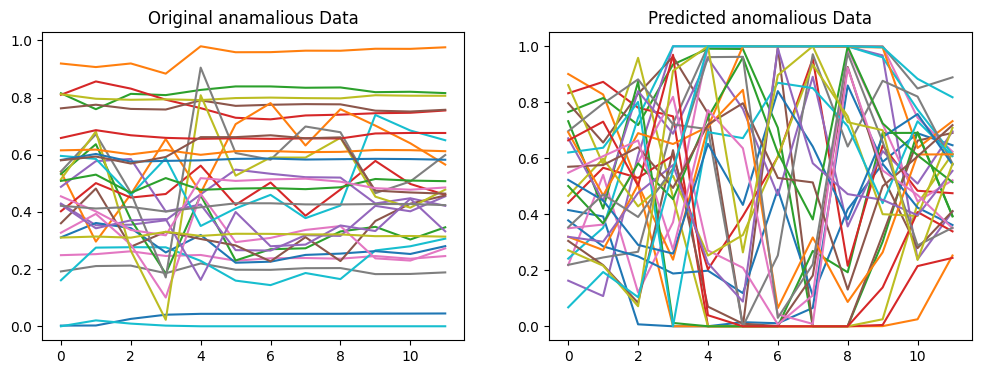

In [ ]:
plt.figure(figsize=(12, 4))

# Subplot for original data
plt.subplot(1, 2, 1)
plt.plot(x_anomalies_scaled[0])
plt.title('Original anamalious Data')

# Subplot for predicted data
plt.subplot(1, 2, 2)
plt.plot(x_anomalies_pred[0])
plt.title('Predicted anomalious Data')

plt.show()

In [ ]:
dataset = dataframe_2
dataset= dataset.drop('Class', axis=1)
dataset['Time_in_years'] = new_dates


In [ ]:
dataset[:30]

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
13  11.0  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
14  12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15  12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
16  12.0  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
17  13.0 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
18  14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
19  15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   
20  16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
21  17.0  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038   
22  18.0  1.166616  0.502120 -0.067300  2.261569  0.428804  0.089474   
23  18.0  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116   
24  22.0 -1.946525 -0.044901 -0.405570 -1.013057  2.941968  2.955053   
25  22.0 -2.074295 -0.121482  1.322021  0.410008  0.295198 -0.959537   
26  23.0  1.173285  0.353498  0.283905  1.133563 -0.172577 -0.916054   
27  23.0  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   
28  23.0 -0.414289  0.905437  1.727453  1.473471  0.007443 -0.200331   
29  23.0  1.059387 -0.175319  1.266130  1.186110 -0.786002  0.578435   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1  -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2   0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3   0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4   0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
5   0.476201  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
7   1.120631 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709   
8   0.370145  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592   
9   0.651583  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050   
10 -1.423236  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512   
11  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   
12 -0.689405 -0.227487 -2.094011  ... -0.231809 -0.483285  0.084668  0.392831   
13 -0.096717  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744   
14 -0.422911 -1.907107  0.755713  ...  1.151663  0.222182  1.020586  0.028317   
15 -0.608581  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084   
16 -0.586057  0.189380  0.782333  ... -0.024612  0.196002  0.013802  0.103758   
17  0.707642  0.087962 -0.665271  ... -0.194796 -0.672638 -0.156858 -0.888386   
18 -1.559738  0.160842  1.233090  ... -0.503600  0.984460  2.458589  0.042119   
19 -1.080664 -0.053127 -1.978682  ... -0.177650 -0.175074  0.040002  0.295814   
20 -0.878586  0.445290 -0.446196  ... -0.295583 -0.571955 -0.050881 -0

In [ ]:
def extract_time_interval_df(data, start_time, end_time):
    mask = (data['Time_in_years'] >= start_time) & (data['Time_in_years'] <= end_time)    
    data_range = data.loc[mask]

    return data_range


In [ ]:

# Convert the list to a set to get unique timestamps
unique_timestamps = set(new_dates)

for timestamp in sorted(unique_timestamps, reverse=False):
    print(timestamp)

2013-09-01 00:00:00
2013-09-01 00:00:01
2013-09-01 00:00:02
2013-09-01 00:00:04
2013-09-01 00:00:07
2013-09-01 00:00:09
2013-09-01 00:00:10
2013-09-01 00:00:11
2013-09-01 00:00:12
2013-09-01 00:00:13
2013-09-01 00:00:14
2013-09-01 00:00:15
2013-09-01 00:00:16
2013-09-01 00:00:17
2013-09-01 00:00:18
2013-09-01 00:00:22
2013-09-01 00:00:23
2013-09-01 00:00:24
2013-09-01 00:00:25
2013-09-01 00:00:26
2013-09-01 00:00:27
2013-09-01 00:00:29
2013-09-01 00:00:32
2013-09-01 00:00:33
2013-09-01 00:00:34
2013-09-01 00:00:35
2013-09-01 00:00:36
2013-09-01 00:00:37
2013-09-01 00:00:38
2013-09-01 00:00:39
2013-09-01 00:00:40
2013-09-01 00:00:41
2013-09-01 00:00:42
2013-09-01 00:00:44
2013-09-01 00:00:46
2013-09-01 00:00:47
2013-09-01 00:00:48
2013-09-01 00:00:49
2013-09-01 00:00:50
2013-09-01 00:00:51
2013-09-01 00:00:52
2013-09-01 00:00:53
2013-09-01 00:00:54
2013-09-01 00:00:55
2013-09-01 00:00:56
2013-09-01 00:00:59
2013-09-01 00:01:00
2013-09-01 00:01:02
2013-09-01 00:01:04
2013-09-01 00:01:07


In [ ]:
start_time = '2013-09-01 00:00:00'
end_time = '2013-09-02 23:59:52'
interval_data = extract_time_interval_df(dataset, start_time, end_time)
verify_interval_data = interval_data

In [ ]:
print(interval_data.shape)
print("interval ",interval_data)


(284807, 31)
interval              Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698 

In [ ]:
interval_data = interval_data.drop('Time_in_years', axis=1)
interval_data = create_sequences(interval_data.values, sequence_length)
interval_data = scaler.transform(interval_data.reshape(-1, interval_data.shape[-1])).reshape(interval_data.shape)
interval_data.shape

(284796, 12, 30)

In [ ]:
def predict_anomalies(model, threshold, time_interval_data): 
    
    anomaly_scores = model.predict(time_interval_data)
    print("anomaly_scores",anomaly_scores)
    summary_statistic = np.mean(anomaly_scores, axis=-1, keepdims=True)
    print("mean scores",summary_statistic)
    # Identify anomalies based on the summary statistic and threshold
    anomalies = summary_statistic > 0.55
    plt.figure(figsize=(12, 4))

    # Subplot for original data
    plt.subplot(1, 2, 1)
    plt.plot(interval_data[0])
    plt.title('Original range Data')
    
    # Subplot for predicted data
    plt.subplot(1, 2, 2)
    plt.plot(anomaly_scores[0])
    plt.title('Predicted range Data')
    
    plt.show()
    print(anomalies)
    return anomalies



8900/8900 [==============================] - 51s 6ms/step
anomaly_scores [[[0.29067948 0.9010222  0.7960866  ... 0.4537564  0.3152069  0.10147948]
  [0.17673716 0.89525187 0.76577103 ... 0.4131364  0.33401892 0.1209733 ]
  [0.21380995 0.8857393  0.7797598  ... 0.42747706 0.28501922 0.09225578]
  ...
  [0.18469653 0.90009934 0.78651947 ... 0.42022166 0.29334876 0.08569316]
  [0.17561597 0.8927547  0.79025364 ... 0.44600964 0.29132083 0.09187171]
  [0.23417252 0.878871   0.7907497  ... 0.41980472 0.32444993 0.09465211]]

 [[0.2709902  0.8941362  0.7966075  ... 0.44629464 0.31082913 0.10977484]
  [0.15785585 0.88786346 0.777074   ... 0.42285338 0.332915   0.1256607 ]
  [0.1892952  0.8960823  0.8122299  ... 0.42740238 0.26956403 0.08261196]
  ...
  [0.12208127 0.8656263  0.7892324  ... 0.41076243 0.34316114 0.09481815]
  [0.19874997 0.87756884 0.7785667  ... 0.4181035  0.28950182 0.09936158]
  [0.21376097 0.85889703 0.77659214 ... 0.4251371  0.3202769  0.10007074]]

 [[0.27926633 0.8997544

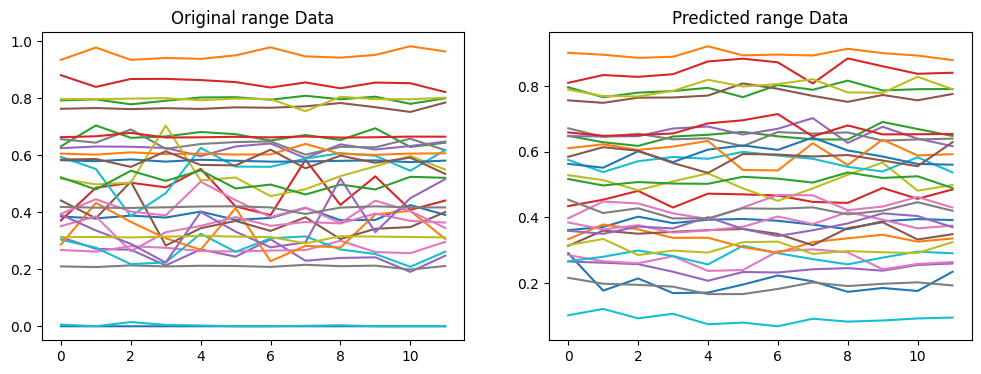

[[[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 ...

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]]


In [ ]:
subset_predictions = predict_anomalies(contractive_convolutional_autoencoder, threshold_contractive, interval_data)

In [ ]:
anomalous_indices = np.where(subset_predictions)[0]
anomalous_instances = verify_interval_data.iloc[anomalous_indices]

In [ ]:
anomalous_instances

Time         V1         V2         V3         V4          V5  \
3963      3600.0  -1.208764  -0.096625   1.878917  -3.389588   -0.762071   
3987      3635.0  -1.297110  -0.057703   3.047503   1.637176    0.026683   
4003      3642.0   1.137227  -0.004168   0.736363   1.004318   -0.646759   
4015      3650.0  -0.613439   1.056831   1.611371   0.127141    0.119485   
4017      3653.0   1.201439  -0.062348   1.385756   1.067040   -1.064001   
...          ...        ...        ...        ...        ...         ...   
274770  166197.0   2.062917   0.598278  -3.171718   0.619652    1.216218   
274770  166197.0   2.062917   0.598278  -3.171718   0.619652    1.216218   
274771  166198.0 -35.548539 -31.850484 -48.325589  15.304184 -113.743307   
274771  166198.0 -35.548539 -31.850484 -48.325589  15.304184 -113.743307   
274771  166198.0 -35.548539 -31.850484 -48.325589  15.304184 -113.743307   

               V6          V7         V8        V9  ...        V21       V22  \
3963    -1.013864    0.797773  -0.532229  3.693687  ...   0.015895  0.744443   
3987     0.202114   -0.111805  -0.024166  1.572831  ...  -0.156991  0.204065   
4003    -0.476669   -0.266511  -0.019929  1.653650  ...  -0.318746 -0.630429   
4015    -0.401680    0.476690  -0.003860  1.074662  ...  -0.341471 -0.735063   
4017    -0.279010   -0.769365   0.027757  2.308457  ...  -0.254783 -0.300808   
...           ...         ...        ...       ...  ...        ...       ...   
274770  -1.370544    0.673803  -0.300302 -0.126312  ...  -0.023905  0.065600   
274770  -1.370544    0.673803  -0.300302 -0.126312  ...  -0.023905  0.065600   
274771  73.301626  120.589494 -27.347360 -3.872425  ... -21.620120  5.712303   
274771  73.301626  120.589494 -27.347360 -3.872425  ... -21.620120  5.712303   
274771  73.301626  120.589494 -27.347360 -3.872425  ... -21.620120  5.712303   

             V23       V24       V25       V26        V27        V28  \
3963   -0.258638  0.363714  0.228621 -1.076380  -0.353821  -0.066396   
3987    0.200646  0.338350  0.133020 -0.282279  -0.139201  -0.103163   
4003    0.033863  0.487558  0.325825  0.201891  -0.064337  -0.000533   
4015    0.041279 -0.033063 -0.325363  0.052405   0.114169   0.114123   
4017    0.057320  0.337844  0.214475  0.281660  -0.012011   0.017902   
...          ...       ...       ...       ...        ...        ...   
274770 -0.040816  0.574319  0.340788  0.661243  -0.090195  -0.024159   
274770 -0.040816  0.574319  0.340788  0.661243  -0.090195  -0.024159   
274771 -1.581098  4.584549  4.554683  3.415636  31.612198 -15.430084   
274771 -1.581098  4.584549  4.554683  3.415636  31.612198 -15.430084   
274771 -1.581098  4.584549  4.554683  3.415636  31.612198 -15.430084   

          Amount       Time_in_years  
3963      109.89 2013-09-01 01:00:00  
3987       46.80 2013-09-01 01:00:35  
4003       27.43 2013-09-01 01:00:42  
4015       11.48 2013-09-01 01:00:50  
4017        0.00 2013-09-01 01:00:53  
...          ...                 ...  
274770      0.76 2013-09-02 22:09:57  
274770      0.76 2013-09-02 22:09:57  
274771  25691.16 2013-09-02 22:09:58  
274771  25691.16 2013-09-02 22:09:58  
274771  25691.16 2013-09-02 22:09:58  

[1220 rows x 31 columns]

#### für ein sparse autoencoder 

In [ ]:
subset_predictions = predict_anomalies(sparse_convolutional_autoencoder, threshold_contractive, interval_data)